# E-commerce: выявление профилей потребеителя, с целью опредленения эффективной маркетинговой стратегии путем реклоамной рассылки

**Задача**: сегментировать клиентов по профилю потребления.

**Описание проекта:** интернет-магазин "Пока все еще тут", хочет провести таргетированную рассылку писем с предложениями. Наша задача выявить самых преспективных клиентов, путем сегментации и анализа купленных товаров покупателями.

# Материалы

**Презентация:** https://disk.yandex.ru/i/TyU6nhZmFzOM_g

# План проекта:

**Проведение исследовательского анализа данных:**

 Загрузка и знакомство с датафрэймом
 
 Предворительная обработка данных
 
 Выявление аномалий, пропусков, дубликатов и неявных дубликатов
 
 Форматирование данных
 
  Расчет: среднего количества заказов на одного покупателя, количества уникальных покупателей,количество уникальных товаров, количество уникальных заказов, средняя выручка с одного покупателя, средняя сумма заказа, среднее число позиций товаров в заказах, среднее число единиц товаров в заказах
  
  Рассмотрение среднего чека, динамики выручки, DAU, MAU, Retention Rate продаж, для выявления сосотояния бизнеса на данный момент
  
  Визуализация данных: построение гистограмм, ящиков с усами. Для анализа распределения данных.
  
**Сегментация покупателей на основе истории их покупок:**

  Расчет, проведение RFM анализа
  
  Создание категеорий товаров, определение сезонных товаров
  
  Определим количество товаров по категориям
  
  Определим самые продаваемые товары
  
  Выручка и средний чек в разрезе категорий товаров
  
  Рассмотрение тех же метрик но по месяцам
  
**Создание кластеров клиентов**

**Выдвижение и проверка гипотез**

**Заключение, общий вывод**

# Содержание
* [Предобработка данных](#chapter1)
* [Исследовательский анализ данных](#chapter2)
* [Сегментация покупателей на основе их покупок](#chapter3)
    * [Разделение товаров на категории](#section_3_1)
    * [RFM анализ, сегментация клиентов](#section_3_1)
* [Выдвижение и проверка сатистических гипотез](#chapter4)
* [Рассмотрение категорий товаров и сезонности через призму сегментов](#chapter5)
    * [Категории](#section_5_1)
    * [Сезонность](#section_5_1)
* [Общий вывод](#chapter6) 

# Описание данных

**Файл: 'yandex/ecom_dataset_upd.csv'**

**date** - дата заказа

**customer_id** - уникальный идентификатор покупателя

**order_id** - уникальный идентификатор заказа (если он одинаковый в разных строках датафрэйма, это означает, что это один заказ с несколькими позициями)

**product** - название товара

**quantity** - количество товара

**price** - цена товара в условных единицах (у.е.)

## Предобработка данных <a class="anchor" id="chapter1"></a>

In [1]:
# импортирование библиотек
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import warnings
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from pymystem3 import Mystem
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
warnings.filterwarnings("ignore")

In [2]:
# Загрузка датафрэйма
online_shop = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

In [3]:
#Функция получения первичной информации о датафрейме

def first_look (data):
    print('Первые 10 строк')
    display(data.head(10))
    print('*'*50)
    print('Последние 10 строк')
    display(data.tail(10))
    print('*'*50)
    print('Типы данных\n')
    display(data.info())
    print('*'*50)
    print('Статистическая сводка')
    display(data.describe())
    print('*'*50)
    print('Пропуски\n')
    display(data.isna().sum())
    print('*'*50)
    print('\nПроцент пропусков от всего датасета')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('*'*50)
    print('\nДубликаты\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
first_look(online_shop)

Первые 10 строк


date                           customer_id  ...  quantity  price
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  142.0
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  194.0
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  112.0
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  179.0
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  112.0
5  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  164.0
6  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920  ...         1  134.0
7  2018100108  375e0724-f033-4c76-b579-84969cf38ee2  ...         1  824.0
8  2018100108  6644e5b4-9934-4863-9778-aaa125207701  ...         1  269.0
9  2018100109  c971fb21-d54c-4134-938f-16b62ee86d3b  ...         1  674.0

[10 rows x 6 columns]

**************************************************
Последние 10 строк


date                           customer_id  ...  quantity   price
7464  2020012913  28437f82-c2a8-41ea-a7c1-bcedece59d8b  ...         1  1124.0
7465  2020012913  0b2157e5-101e-4e0e-bfaf-7340ed23e574  ...         1   749.0
7466  2020012914  904015ba-31f2-4ce4-b68e-02362280a43d  ...         1   172.0
7467  2020012917  4228e34b-dcba-4df8-ae70-b282e84a1edb  ...         1  2399.0
7468  2020013008  370ed405-57f6-4eff-ab2e-a0bacab6e982  ...         1    74.0
7469  2020013021  63208953-a8e4-4f77-9b47-3a46e7b72eee  ...         2    38.0
7470  2020013022  d99d25f1-4017-4fcd-8d29-c580cc695a1a  ...         1   869.0
7471  2020013102  2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6  ...         1   354.0
7472  2020013112  cdd17932-623e-415f-a577-3b31312fd0e2  ...         1   128.0
7473  2020013115  2e460a26-35af-453d-a369-a036e95a40e0  ...         1   104.0

[10 rows x 6 columns]

**************************************************
Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


None

**************************************************
Статистическая сводка


date       order_id     quantity         price
count  7.474000e+03    7474.000000  7474.000000   7474.000000
mean   2.018913e+09   49449.884265     2.362858    478.737501
std    4.278878e+05   32679.642404    14.500497    901.615895
min    2.018100e+09   12624.000000     1.000000      9.000000
25%    2.019022e+09   14833.000000     1.000000     97.000000
50%    2.019051e+09   68768.000000     1.000000    135.000000
75%    2.019063e+09   71257.750000     1.000000    439.000000
max    2.020013e+09  112789.000000  1000.000000  14917.000000

**************************************************
Пропуски



date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

**************************************************

Процент пропусков от всего датасета


date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

**************************************************

Дубликаты

Дубликатов НЕТ


явных дубликатов нет;

пропусков нет;

типы данных в колонке date не соответствуют содержанию;

всего 7474 строки.

In [5]:
# проверим скрытые дубликаты
online_shop[['customer_id', 'order_id', 'product']].duplicated().sum()

1886

In [6]:
#удалим скрытые дубликаты 
online_shop = online_shop.drop_duplicates(subset = ['customer_id', 'order_id', 'product']).reset_index()

In [7]:
# проверим удалились ли скрытые дубликаты
online_shop[['customer_id', 'order_id', 'product']].duplicated().sum()

0

In [8]:
# переведем в нижний регистр названия товара 
online_shop['product'] = online_shop['product'].str.lower()

In [9]:
# преобразуем столбец date и добавим столбец месяц
online_shop['date'] = pd.to_datetime(online_shop['date'], format='%Y%m%d%H%M')
online_shop['month'] = pd.DatetimeIndex(online_shop['date']).month

In [10]:
#создадим столбец с вырочкой
online_shop['revenue'] = online_shop.quantity * online_shop.price

In [11]:
# создадим столбец в днях
online_shop['day'] = online_shop['date'].dt.strftime('%Y-%m-%d')

In [12]:
online_shop.head(10)

index                date  ... revenue         day
0      0 2018-10-01 00:00:00  ...   142.0  2018-10-01
1      1 2018-10-01 00:00:00  ...   194.0  2018-10-01
2      2 2018-10-01 00:00:00  ...   112.0  2018-10-01
3      3 2018-10-01 00:00:00  ...   179.0  2018-10-01
4      4 2018-10-01 00:00:00  ...   112.0  2018-10-01
5      5 2018-10-01 00:00:00  ...   164.0  2018-10-01
6      6 2018-10-01 00:00:00  ...   134.0  2018-10-01
7      7 2018-10-01 00:08:00  ...   824.0  2018-10-01
8      8 2018-10-01 00:08:00  ...   269.0  2018-10-01
9      9 2018-10-01 00:09:00  ...   674.0  2018-10-01

[10 rows x 10 columns]

In [13]:
# смотрим за какой период у нас данных
print('Рассматриваемый период: с', online_shop['date'].min().date(), "по" , online_shop['date'].max().date())

Рассматриваемый период: с 2018-10-01 по 2020-01-31


In [14]:
online_shop.describe()

index       order_id  ...        month        revenue
count  5588.000000    5588.000000  ...  5588.000000    5588.000000
mean   3609.301539   56044.164102  ...     6.673407     829.863174
std    2305.309306   32374.942495  ...     3.605153    9170.194264
min       0.000000   12624.000000  ...     1.000000       9.000000
25%    1626.750000   14814.000000  ...     4.000000     120.000000
50%    3256.500000   69227.500000  ...     6.000000     192.500000
75%    5982.250000   71934.500000  ...    10.000000     734.000000
max    7473.000000  112789.000000  ...    12.000000  675000.000000

[8 rows x 6 columns]

Среднее количество единиц товаров в заказах составляет 2.5. Стоимость товаров варьируется от 9 у.е. до 14 917 у.е. При этом медианная цена составляет 150 у.е., а средняя стоимость - 531.58 у.е.

Есть заказ, в котором количество единиц одного товара достигает 1000. Давайте подробнее рассмотрим, что это за товар, который был заказан в таком большом количестве.

Для начала отметим, что разброс цен на товары очень велик. Нижняя граница цены (9 у.е.) говорит о наличии доступных товаров, тогда как верхняя граница (14 917 у.е.) указывает на присутствие премиальных или специализированных товаров с высокой стоимостью. Средняя стоимость товара равна 531.58 у.е., что значительно выше медианы в 150 у.е. Это означает, что распределение цен на товары имеет длинный правый хвост. В таком распределении большинство товаров имеют относительно низкую стоимость, но есть несколько дорогих товаров, которые сильно влияют на среднее значение.

In [15]:
online_shop[online_shop['quantity']==1000]

index                date  ...   revenue         day
3819   5456 2019-06-18 01:05:00  ...  675000.0  2019-06-18

[1 rows x 10 columns]

In [16]:
# удалим эту аномалию
online_shop = online_shop.drop(online_shop[online_shop['customer_id'] == '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6'].index)

Покупатель с 1000 купленными вантузами будет искажать данные, удалим его

In [17]:
# Группировка по order_id и подсчет уникальных customer_id
order_customer_counts = online_shop.groupby('order_id')['customer_id'].nunique()
# Фильтрация заказов, совершенных более чем одним пользователем
multi_customer_order_ids = order_customer_counts[order_customer_counts > 1].index
# Оставим только первую запись для таких заказов
first_entries = online_shop[online_shop['order_id'].isin(multi_customer_order_ids)].drop_duplicates('order_id', keep='first')
# Удаление всех записей и добавление только первых записей для таких заказов
online_shop = online_shop[~online_shop['order_id'].isin(multi_customer_order_ids)].append(first_entries)

Некоторые заказы были выполнены 2 покупателями, оставим в датасете только первую запись такого заказа

In [18]:
# проверка
order_customer_counts = online_shop.groupby('order_id')['customer_id'].nunique()
multi_customer_orders = order_customer_counts[order_customer_counts > 1]
multi_customer_orders

Series([], Name: customer_id, dtype: int64)

**Вывод**:

В таблице представлены данные о заказах покупателей в интернет-магазине за период с 1 октября 2018 г. по 31 января 2020 г. Для удобства анализа были добавлены столбцы, указывающие месяц, день и выручку по каждому заказу.

Все данные очищены: дубликатов и пропусков нет. Количество товаров в заказах варьируется от 1 до 1000 единиц, со средним значением в 2.5 единицы. Цены на товары колеблются от 9 у.е. до 14 917 у.е., при этом медианная стоимость составляет 150 у.е., а средняя стоимость - 531.58 у.е. Это указывает на значительные разбросы в стоимости, которые сильно влияют на среднее значение.

Обнаружен заказ с максимальным количеством единиц товара - 1000. Анализ показал, что медианная и средняя стоимость товаров и выручки различаются в несколько раз, что свидетельствует о наличии выбросов. Для корректности анализа данный заказ был исключен.

Средняя выручка составляет 68 760 у.е. за товарную позицию (не за заказ). Наибольший зафиксированный заказ по стоимости составил 112 789 у.е.

## Исследовательский анализ данных <a class="anchor" id="chapter2"></a>

Давайте проанализируем и оценим ключевые метрики:

**Среднее количество заказов на одного покупателя**: Определим, сколько заказов в среднем делает один покупатель. Это даст нам представление о лояльности и активности клиентов.

**Количество уникальных покупателей**: Подсчитаем общее число покупателей, которые совершили хотя бы один заказ. Эта метрика поможет оценить охват и привлечение новых клиентов.

**Количество уникальных товаров**: Определим, сколько различных товаров было заказано. Это позволит понять разнообразие ассортимента, который привлекает покупателей.

**Количество уникальных заказов**: Подсчитаем общее число заказов. Эта метрика даст общее представление о деловой активности и количестве транзакций.

**Средняя выручка с одного покупателя**: Рассчитаем среднюю сумму, которую приносит один покупатель за весь период. Это поможет оценить ценность каждого клиента для бизнеса.

**Средняя сумма заказа**: Определим, сколько в среднем тратит покупатель за один заказ. Это даст представление о покупательской способности и среднем чеке.

**Среднее число позиций товаров в заказах**: Рассчитаем, сколько различных товаров в среднем включено в один заказ. Это поможет понять разнообразие покупок в рамках одного заказа.

**Среднее число единиц товаров в заказах**: Определим, сколько единиц товаров в среднем содержится в одном заказе. Это покажет, насколько объемными являются заказы по количеству товаров.

In [19]:
online_shop['total_price'] = online_shop['quantity'] * online_shop['price']
online_shop['month'] = online_shop['date'].astype('datetime64[M]') 
median_order = online_shop.groupby('customer_id').agg({'order_id':'count'})

grouped_online_shop = online_shop.groupby(['customer_id', 'order_id'])\
.agg({'date':'first', 'product':'count', 'quantity':'sum','price':'mean', 'total_price':'sum'}).reset_index()\
.rename(columns={'date':'first_date_order', 'product':'cnt_unique_products_in_order', 
                 'quantity':'total_cnt_goods_in_order', 'price':'avg_product_price', 'total_price':'order_price'})

online_shop_customers = grouped_online_shop.groupby('customer_id')\
.agg({'order_id':'nunique', 'cnt_unique_products_in_order':'mean', 'total_cnt_goods_in_order':'mean', 
      'avg_product_price':'mean', 'order_price':['sum','mean']}).reset_index()

online_shop_customers.columns = ['customer_id', 'cnt_orders', 'avg_products_in_order', 'avg_goods_in_order', 
                                'avg_product_price', 'total_revenue', 'avg_order_price']
display(online_shop)
display(grouped_online_shop)
online_shop_customers

index                date  ...         day  total_price
0         0 2018-10-01 00:00:00  ...  2018-10-01        142.0
1         1 2018-10-01 00:00:00  ...  2018-10-01        194.0
2         2 2018-10-01 00:00:00  ...  2018-10-01        112.0
3         3 2018-10-01 00:00:00  ...  2018-10-01        179.0
4         4 2018-10-01 00:00:00  ...  2018-10-01        112.0
...     ...                 ...  ...         ...          ...
4224   6026 2019-08-02 01:05:00  ...  2019-08-02         22.0
4594   6440 2019-09-27 00:00:00  ...  2019-09-27        149.0
4601   6447 2019-09-28 01:00:00  ...  2019-09-28       1424.0
4652   6504 2019-10-03 01:04:00  ...  2019-10-03       2360.0
4735   6601 2019-10-13 01:05:00  ...  2019-10-13        974.0

[5550 rows x 11 columns]

customer_id  ...  order_price
0     000d6849-084e-4d9f-ac03-37174eaf60c4  ...        555.0
1     001cee7f-0b29-4716-b202-0042213ab038  ...        442.0
2     00299f34-5385-4d13-9aea-c80b81658e1b  ...        914.0
3     002d4d3a-4a59-406b-86ec-c3314357e498  ...       1649.0
4     003bbd39-0000-41ff-b7f9-2ddaec152037  ...       2324.0
...                                    ...  ...          ...
3515  ff601403-b094-4b86-9ac6-264d725b9277  ...         90.0
3516  ffaeab76-3a8d-49ee-860f-17273b2fc8a2  ...        397.0
3517  ffb5976a-7a4d-460b-95c4-5ffaba31cb24  ...        389.0
3518  ffb80538-3fda-4351-8ea9-9d2bec58bb07  ...        974.0
3519  ffe82299-3f5b-4214-87fe-3d36ecccfac3  ...        577.0

[3520 rows x 7 columns]

customer_id  ...  avg_order_price
0     000d6849-084e-4d9f-ac03-37174eaf60c4  ...            555.0
1     001cee7f-0b29-4716-b202-0042213ab038  ...            442.0
2     00299f34-5385-4d13-9aea-c80b81658e1b  ...            914.0
3     002d4d3a-4a59-406b-86ec-c3314357e498  ...           1649.0
4     003bbd39-0000-41ff-b7f9-2ddaec152037  ...           2324.0
...                                    ...  ...              ...
2424  ff601403-b094-4b86-9ac6-264d725b9277  ...            869.5
2425  ffaeab76-3a8d-49ee-860f-17273b2fc8a2  ...            397.0
2426  ffb5976a-7a4d-460b-95c4-5ffaba31cb24  ...            389.0
2427  ffb80538-3fda-4351-8ea9-9d2bec58bb07  ...            974.0
2428  ffe82299-3f5b-4214-87fe-3d36ecccfac3  ...            577.0

[2429 rows x 7 columns]

Сводная статистика

In [20]:
print('Общее количество уникальных покупателей: {:.0f}'.format(len(online_shop['customer_id'].unique())))
print('Общее количество уникальных товаров: {:.0f}'.format(len(online_shop['product'].unique())))
print('Количество уникальных заказов: {:.0f}'.format(len(online_shop['order_id'].unique())))
print('Медианный чек по всем покупателям: {:.0f} у.е.'.format((online_shop_customers['total_revenue']/online_shop_customers['cnt_orders']).median()))
print('Медианная выручка с одного покупателя: {:.0f} у.е.'.format(online_shop_customers['total_revenue'].median()))
print('Медианное число позиций товаров в заказах: {:.0f} шт.'.format(online_shop_customers['avg_products_in_order'].median()))
print('Медианное число единиц товаров в заказах: {:.0f} шт.'.format(online_shop_customers['avg_goods_in_order'].median()))

Общее количество уникальных покупателей: 2429
Общее количество уникальных товаров: 2339
Количество уникальных заказов: 3520
Медианный чек по всем покупателям: 646 у.е.
Медианная выручка с одного покупателя: 838 у.е.
Медианное число позиций товаров в заказах: 1 шт.
Медианное число единиц товаров в заказах: 1 шт.


**Посмотрим количество единиц товаров в одной покупке**

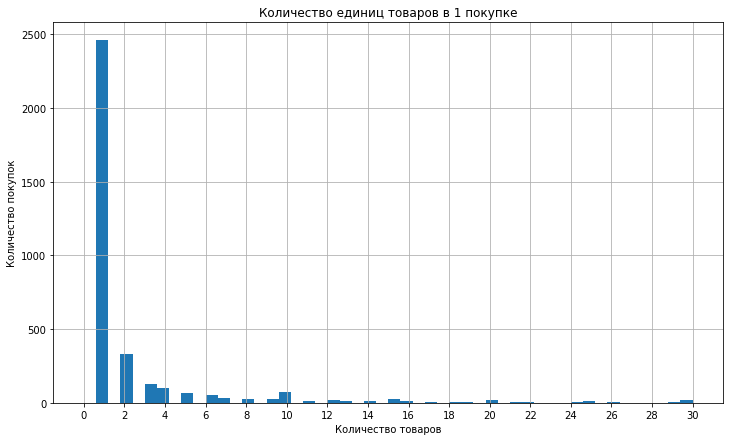

In [21]:
online_shop.groupby('order_id').agg({'quantity': 'sum'}).hist(range=(0, 30), bins=50,figsize=(12, 7))

plt.title('Количество единиц товаров в 1 покупке')
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Количество товаров')
plt.ylabel('Количество покупок');

Большинство покупателей покупают одну единицу товара, некотрое количество от 2-4 единиц товара

**Изменение количества покупок в месяц**

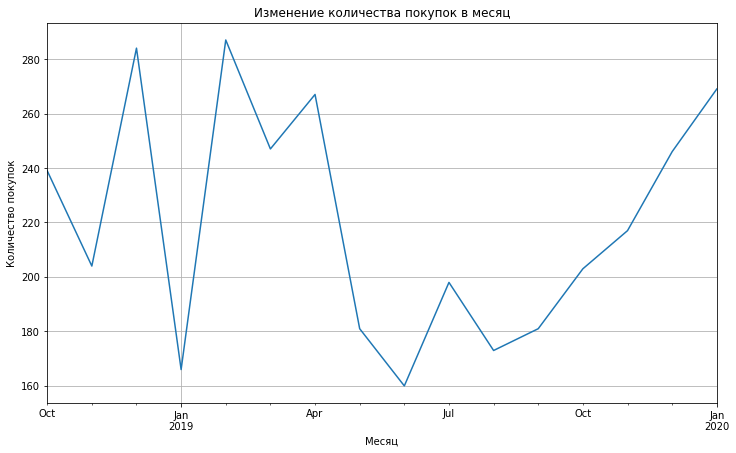

In [22]:
online_shop.groupby(['month']).agg({'order_id': 'nunique'}) \
    .plot(grid=True, legend=False,figsize=(12, 7))
plt.title('Изменение количества покупок в месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество покупок');

Наибольшее количество заказов было зафиксировано в декабре 2018 года, а также в феврале, марте и апреле 2019 года. Эти пики активности можно связать с новогодними праздниками и началом весеннего дачного сезона, когда покупатели традиционно делают больше покупок.

В январе и июне наблюдался значительный спад в количестве заказов. Январский провал можно объяснить постпраздничным затишьем, когда покупатели уже потратили значительные суммы на новогодние праздники и рождественские распродажи. Снижение активности в июне связано с окончанием весеннего сезона и началом летних отпусков, когда интерес к покупкам временно ослабевает.

Однако начиная с ноября количество заказов снова начало расти. Это связано с подготовкой к новогодним и рождественским праздникам, когда покупатели активно делают покупки, чтобы подготовиться к праздникам и воспользоваться сезонными скидками.

**Выручка с одной покупки**

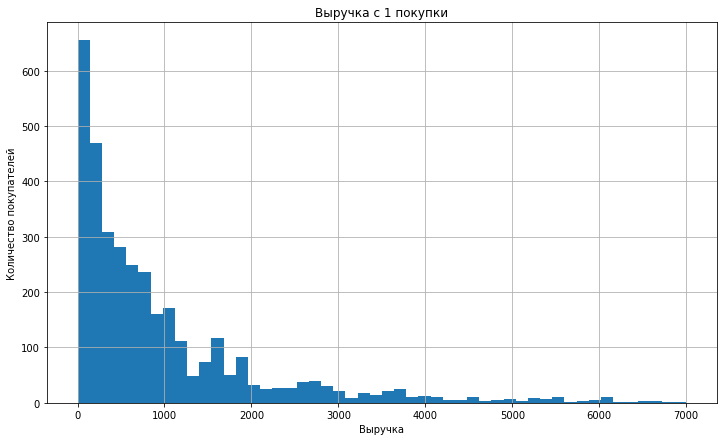

In [23]:
online_shop.groupby('order_id').agg({'revenue': 'sum'}).hist(range=(0, 7000), bins=50,figsize=(12, 7))

plt.title('Выручка с 1 покупки')
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Выручка')
plt.ylabel('Количество покупателей');

95-й и 99-й перцентили выручки по заказам

In [24]:
revenue_unique_orders = (
    online_shop.groupby('order_id', as_index=False)
    .agg({'revenue': 'sum'})
)
print(np.percentile(revenue_unique_orders['revenue'], [95, 99])) 

[3760.8  7492.96]


In [25]:
online_shop.groupby('order_id').agg({'revenue': 'sum'}).describe()

revenue
count   3520.000000
mean    1117.940175
std     2079.935722
min        9.000000
25%      189.500000
50%      577.000000
75%     1237.000000
max    49432.000000

Средняя выручка или чек с заказа составляет 1125.64 у.е., медиана - 584 у.е. Минимальная выручка с покупки - 9 у.е., максимальная - 49 432 у.е. 5% заказов принесли выручку не менее 3776 у.е. 1% заказов - не менее 7663.42 у.е.

**Выручка на 1 покупателя**

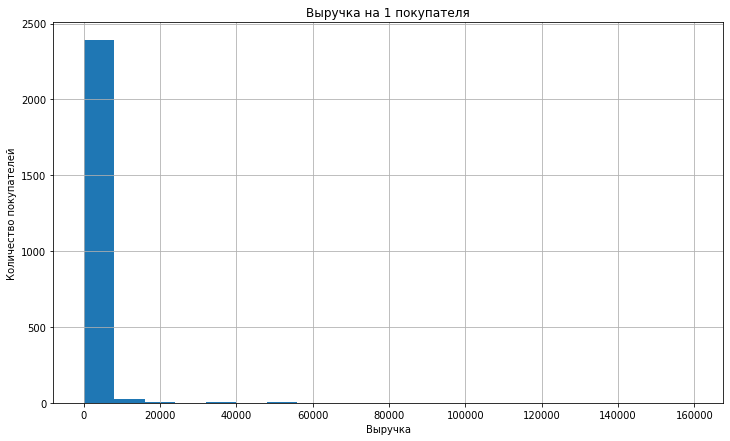

In [26]:
online_shop.groupby('customer_id').agg({'revenue': 'sum'}).hist(bins=20,figsize=(12, 7))

plt.title('Выручка на 1 покупателя')
plt.xlabel('Выручка')
plt.ylabel('Количество покупателей');

95-й и 99-й перцентили выручки по пользователя

In [27]:
revenue_unique_customers = (
    online_shop.groupby('customer_id', as_index=False)
    .agg({'revenue': 'sum'})
)
print(np.percentile(revenue_unique_customers['revenue'], [95, 99])) 

[4871.2  9793.76]


In [28]:
online_shop.groupby('customer_id').agg({'revenue': 'sum'}).describe()

revenue
count    2429.000000
mean     1620.069747
std      4327.287828
min        15.000000
25%       389.000000
50%       838.000000
75%      1798.000000
max    159508.000000

Один покупатель принес за весь период в среднем 1617.25 у.е., медиана - 838.5 у.е. Минимальная сумма - 15 у.е., максимальная - 159508 у.е. 5% пользователей принесли выручку не менее 4856.2 у.е. 1% пользователей - не менее 9702.83 у.е.

**Изменение общей выручки по месяцам**

revenue
month                    
2018-10-01  351536.000000
2018-11-01  359348.000000
2018-12-01  352764.000000
2019-01-01  230695.000000
2019-02-01  306383.000000
2019-03-01  251561.000000
2019-04-01  317602.000000
2019-05-01  235889.000000
2019-06-01  226305.000000
2019-07-01  234932.000000
2019-08-01  172122.000000
2019-09-01  179524.000000
2019-10-01  210775.000000
2019-11-01  128791.750000
2019-12-01  202885.333333
2020-01-01  174036.333333

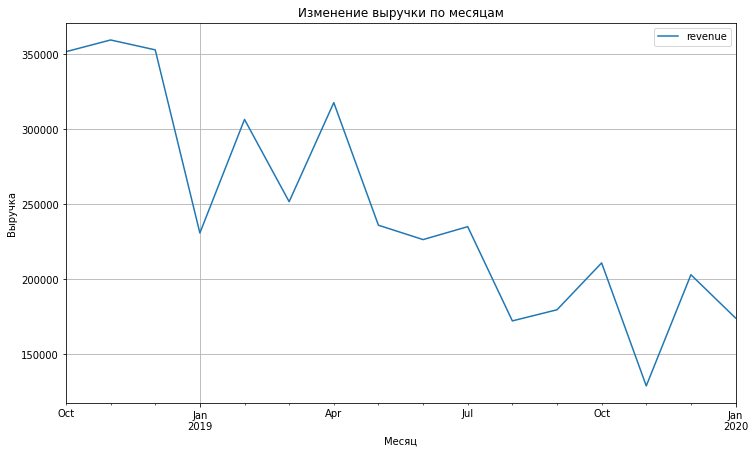

In [29]:
online_shop.groupby(['month']).agg({'revenue': 'sum'}) \
      .plot(grid=True,figsize=(12, 7))
plt.title('Изменение выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
display(online_shop.groupby(['month']).agg({'revenue': 'sum'}))

Выручка в ноябре 2018 составила 359 348 у.е - самый высокий показатель.

**Изменение среднего чека покупателя по месяцам**

month        revenue  customer_id    avg_check
0  2018-10-01  351536.000000          180  1952.977778
1  2018-11-01  359348.000000          178  2018.808989
2  2018-12-01  352764.000000          233  1514.008584
3  2019-01-01  230695.000000          150  1537.966667
4  2019-02-01  306383.000000          245  1250.542857
5  2019-03-01  251561.000000          232  1084.314655
6  2019-04-01  317602.000000          238  1334.462185
7  2019-05-01  235889.000000          167  1412.508982
8  2019-06-01  226305.000000          151  1498.708609
9  2019-07-01  234932.000000          186  1263.075269
10 2019-08-01  172122.000000          165  1043.163636
11 2019-09-01  179524.000000          173  1037.710983
12 2019-10-01  210775.000000          174  1211.350575
13 2019-11-01  128791.750000          217   593.510369
14 2019-12-01  202885.333333          246   824.737127
15 2020-01-01  174036.333333          269   646.975217

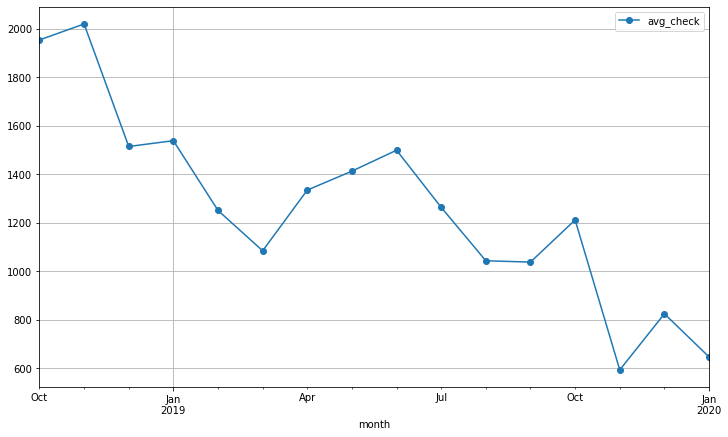

In [30]:
avg_check = online_shop.groupby(['month']).agg({'revenue':'sum','customer_id':'nunique'}).reset_index()
avg_check['avg_check'] = avg_check['revenue'] / avg_check['customer_id']
display(avg_check)
avg_check.plot(marker='o', x='month', y='avg_check', grid=True,figsize=(12, 7))
plt.show()

Самый большой средний чек покупателя в ноябре 2018 и составил 2018.80 у.е. хотя кол-во покупок не самое большое

**Вывод**:

Наибольшее количество заказов были сделаны покупателями в в декабре 2018 г., феврале 2019 г., в марте и апреле 2019 г. новогодние праздники и весна(начало дачного сезона). Большой провал в январе и июне. И снова подъем с ноября.

Средняя выручка или чек с заказа составляет 1125.64 у.е., медиана - 584 у.е. Минимальная выручка с покупки - 9 у.е., максимальная - 49 432 у.е. 5% заказов принесли выручку не менее 3776 у.е. 1% заказов - не менее 7663.42 у.е.

Один покупатель принес за весь период в среднем 1617.25 у.е., медиана - 838.5 у.е. Минимальная сумма - 15 у.е., максимальная - 159508 у.е. 5% пользователей принесли выручку не менее 4856.2 у.е. 1% пользователей - не менее 9702.83 у.е.

Выручка в ноябре 2018 составила 359 348 у.е - самый высокий показатель. Самый большой средний чек покупателя также в ноябре 2018 и составил 2018.80 у.е. хотя кол-во покупок не самое большое

**Рассчитаем продуктовые метрики DAU,MAU и Retention Rate**

In [31]:
dau_total = (online_shop.groupby(['day']).agg({'customer_id': 'nunique'}).mean())
print('Среднее количество уникальных покупателей в день:', int(dau_total))

mau_total = (online_shop.groupby(['month']).agg({'customer_id': 'nunique'}).mean())
print('Среднее количество уникальных покупателей в месяц:', int(mau_total))

sessions_per_user = online_shop.groupby('date').agg({'customer_id':'count'}).mean()
print('Среднее количество сессий в день:', int(sessions_per_user))

Среднее количество уникальных покупателей в день: 6
Среднее количество уникальных покупателей в месяц: 200
Среднее количество сессий в день: 2


In [32]:
#Определим время первого визита
first_activity_date = online_shop.groupby('customer_id')['date'].min()
first_activity_date.name = 'first_activity_date'
first_activity_date.to_frame().reset_index().head()

customer_id first_activity_date
0  000d6849-084e-4d9f-ac03-37174eaf60c4 2019-10-16 00:08:00
1  001cee7f-0b29-4716-b202-0042213ab038 2019-02-16 01:01:00
2  00299f34-5385-4d13-9aea-c80b81658e1b 2019-10-14 02:03:00
3  002d4d3a-4a59-406b-86ec-c3314357e498 2019-01-27 01:07:00
4  003bbd39-0000-41ff-b7f9-2ddaec152037 2019-09-29 01:07:00

Первый визит за покупками был 2019-01-27 01:07.

In [33]:
#Определим дату первой активности
online_shop = online_shop.join(first_activity_date, on='customer_id', how='left')
online_shop['first_activity_date'] = online_shop['first_activity_date'].astype('datetime64[M]')
online_shop['first_month'] = online_shop['date'].astype('datetime64[M]')
#создадим лайфтайм когорты
online_shop['cohort_lifetime'] = online_shop['first_month'] - online_shop['first_activity_date']
online_shop['cohort_lifetime'] = online_shop['cohort_lifetime'] / np.timedelta64(1,'M')
online_shop['cohort_lifetime'] = online_shop['cohort_lifetime'].round().astype(int)
# Сгруппируем данные когорты
cohorts = online_shop.groupby(['first_activity_date', 'cohort_lifetime']).agg({'customer_id':'nunique'}).reset_index()
cohorts.head()

first_activity_date  cohort_lifetime  customer_id
0          2018-10-01                0          180
1          2018-10-01                1            1
2          2018-10-01                2            1
3          2018-10-01                3            3
4          2018-10-01                4            1

Первая активность была 01.10.2018

In [34]:
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_date', 'customer_id']]
# Переименуем столбец customer_id
initial_users_count = initial_users_count.rename(columns={'customer_id':'cohort_users'}) 
# Объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count, on='first_activity_date')
cohorts.head()

first_activity_date  cohort_lifetime  customer_id  cohort_users
0          2018-10-01                0          180           180
1          2018-10-01                1            1           180
2          2018-10-01                2            1           180
3          2018-10-01                3            3           180
4          2018-10-01                4            1           180

In [35]:
#Рассчитаем Retention Rate
cohorts['retention'] = cohorts['customer_id'] / cohorts['cohort_users']

In [36]:
retention_pivot = cohorts.pivot_table(index='first_activity_date', columns='cohort_lifetime',
                                                            values='retention', aggfunc='sum').round(3)
retention_pivot.fillna('')

cohort_lifetime       0      1      2      3   ...     10     11     12     13
first_activity_date                            ...                            
2018-10-01           1.0  0.006  0.006  0.017  ...                0.028  0.233
2018-11-01           1.0                       ...                 0.26       
2018-12-01           1.0  0.004                ...         0.353              
2019-01-01           1.0  0.021         0.007  ...  0.308  0.021              
2019-02-01           1.0  0.017  0.012         ...  0.407                     
2019-03-01           1.0  0.031  0.004  0.004  ...                            
2019-04-01           1.0  0.022         0.004  ...                            
2019-05-01           1.0  0.012         0.012  ...                            
2019-06-01           1.0  0.014                ...                            
2019-07-01           1.0  0.011  0.005         ...                            
2019-08-01           1.0         0.012         ...                            
2019-09-01           1.0  0.006                ...                            
2019-10-01           1.0                0.012  ...                            
2019-11-01           1.0                       ...                            
2019-12-01           1.0                       ...                            
2020-01-01           1.0                       ...                            

[16 rows x 14 columns]

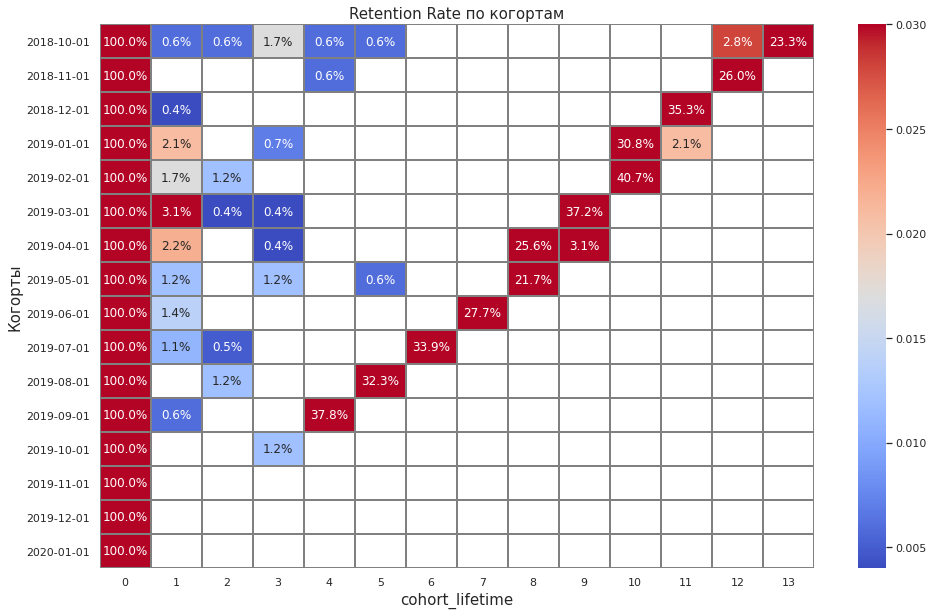

In [37]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Retention Rate по когортам', fontsize=15)
ax=sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=0.03)
ax.set_yticklabels(retention_pivot.index.date)
plt.xlabel('cohort_lifetime', fontsize=15)
plt.ylabel('Когорты', fontsize=15);

In [38]:
mean_retention = retention_pivot[1].mean() * 100
print('Средний Retention Rate на второй месяц «жизни» когорт:', mean_retention.round(2), '%')

Средний Retention Rate на второй месяц «жизни» когорт: 1.44 %


**Вывод:**

Первый визит для совершения покупок был зафиксирован 27 января 2019 года в 01:07. Первая активность на платформе наблюдалась 1 октября 2018 года, когда количество активных покупателей составило 181 человек. В среднем, ежедневно на платформе присутствует около 6 уникальных покупателей, а ежемесячно это число достигает 198 уникальных пользователей. В среднем на каждого покупателя приходится по 2 сессии в день.

Показатель удержания (Retention Rate) варьируется от 0.4% до 40.8%. Средний Retention Rate на второй месяц после привлечения покупателей составляет 1.36%, что указывает на низкую жизненную ценность когорт. Это значит, что большинство пользователей не возвращаются на платформу после первого месяца, что свидетельствует о необходимости улучшения стратегии удержания клиентов.

**Статистические метрики E-commerce**

Определим сумму покупок по каждому заказу

In [39]:
# Получим месяц первой покупки каждого покупателя
first_orders = online_shop.groupby('customer_id').agg({'month':'min'}).reset_index()
first_orders.columns = ['customer_id', 'first_order_month']
# Посчитаем количество новых покупателей n_buyers за каждый месяц
cohort_sizes = (first_orders.groupby('first_order_month').agg({'customer_id':'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

first_order_month  n_buyers
0         2018-10-01       180
1         2018-11-01       177
2         2018-12-01       232
3         2019-01-01       146
4         2019-02-01       241
5         2019-03-01       226
6         2019-04-01       227
7         2019-05-01       161
8         2019-06-01       148
9         2019-07-01       183
10        2019-08-01       161
11        2019-09-01       172
12        2019-10-01       165
13        2019-11-01         2
14        2019-12-01         3
15        2020-01-01         5

Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами.

In [40]:
online_shop = pd.merge(online_shop, first_orders, on='customer_id')
online_shop['first_order_month'] = online_shop['first_activity_date'].astype('datetime64[M]')

Сгруппируем данные по first_order_month и оценим показатели каждой когорты

In [41]:
cohort_grouped = online_shop.groupby('first_order_month').agg({'customer_id':'nunique', 'revenue':'sum'}).reset_index()
cohort_grouped.columns = ['first_order_month', 'customer_id', 'cohort_price_sum']
cohort_grouped

first_order_month  customer_id  cohort_price_sum
0         2018-10-01          180     513774.500000
1         2018-11-01          177     368297.166667
2         2018-12-01          232     345094.833333
3         2019-01-01          146     255635.750000
4         2019-02-01          241     330462.500000
5         2019-03-01          226     321356.666667
6         2019-04-01          227     383795.666667
7         2019-05-01          161     239130.500000
8         2019-06-01          148     263133.833333
9         2019-07-01          183     268500.000000
10        2019-08-01          161     201329.000000
11        2019-09-01          172     230456.500000
12        2019-10-01          165     208415.000000
13        2019-11-01            2        782.500000
14        2019-12-01            3        919.500000
15        2020-01-01            5       4065.500000

In [42]:
#Построим сводную таблицу изменения количества покупателей в когорте
online_shop.pivot_table(index='first_order_month', columns='month', values='customer_id', aggfunc='nunique').fillna('')

month             2018-10-01 2018-11-01  ... 2019-12-01 2020-01-01
first_order_month                        ...                      
2018-10-01             180.0        1.0  ...                      
2018-11-01                        177.0  ...                      
2018-12-01                               ...                      
2019-01-01                               ...        3.0           
2019-02-01                               ...       98.0           
2019-03-01                               ...       84.0           
2019-04-01                               ...       58.0        7.0
2019-05-01                               ...                  35.0
2019-06-01                               ...                  41.0
2019-07-01                               ...                  62.0
2019-08-01                               ...                  52.0
2019-09-01                               ...                  65.0
2019-10-01                               ...                   2.0
2019-11-01                               ...                      
2019-12-01                               ...        3.0           
2020-01-01                               ...                   5.0

[16 rows x 16 columns]

В феврале 2019 года было больше всего покупателей в кол-ве 243 ед.(332075.5 у.е.) Покупателей много, а чек не самый высокий.

In [43]:
# добавим столбец месяца первой покупки
online_shop['first_order_month'] = online_shop['first_order_month'].astype('Datetime64')
online_shop['month'] = online_shop['month'].astype('Datetime64')

In [44]:
# Сгруппируем данные
cohort_data_grouped = online_shop.groupby(['first_order_month', 'month'])\
                        .agg({'customer_id':'nunique', 'revenue':'sum', 'order_id': 'nunique'}).reset_index()
cohort_data_grouped.head()

first_order_month      month  customer_id   revenue  order_id
0        2018-10-01 2018-10-01          180  351536.0       239
1        2018-10-01 2018-11-01            1   24981.0        20
2        2018-10-01 2018-12-01            1   43993.0        43
3        2018-10-01 2019-01-01            3    9449.0         8
4        2018-10-01 2019-02-01            1   44806.0        28

In [45]:
# Найдём лайфтайм когорты
cohort_data_grouped['cohort_lifetime'] = (cohort_data_grouped['month'] - cohort_data_grouped['first_order_month'])
cohort_data_grouped.head()

first_order_month      month  customer_id   revenue  order_id cohort_lifetime
0        2018-10-01 2018-10-01          180  351536.0       239          0 days
1        2018-10-01 2018-11-01            1   24981.0        20         31 days
2        2018-10-01 2018-12-01            1   43993.0        43         61 days
3        2018-10-01 2019-01-01            3    9449.0         8         92 days
4        2018-10-01 2019-02-01            1   44806.0        28        123 days

In [46]:
# Преобразуем этот тип в число месяцев, прошедших между датами
cohort_data_grouped['cohort_lifetime'] = cohort_data_grouped['cohort_lifetime'] / np.timedelta64(1, 'M')
# Округлим значения столбца cohort_lifetime, а затем приведём их к целочисленному типу 
cohort_data_grouped['cohort_lifetime'] = (cohort_data_grouped['cohort_lifetime'].round().astype('int'))
cohort_data_grouped.columns = ['first_order_month', 'order_month', 'count_customer_id', 'revenue_sum',
                                'count_order_id','cohort_lifetime']

cohort_data_grouped.head()

first_order_month order_month  ...  count_order_id  cohort_lifetime
0        2018-10-01  2018-10-01  ...             239                0
1        2018-10-01  2018-11-01  ...              20                1
2        2018-10-01  2018-12-01  ...              43                2
3        2018-10-01  2019-01-01  ...               8                3
4        2018-10-01  2019-02-01  ...              28                4

[5 rows x 6 columns]

Когорты созданы, можно проводить анализы

**Определим средний чек покупателя**

In [47]:
# добавим столбец с выручкой по клиенту
cohort_data_grouped['revenue_per_user'] = (cohort_data_grouped['revenue_sum'] / cohort_data_grouped['count_customer_id'])
cohort_data_grouped.round(2).head(10)

first_order_month order_month  ...  cohort_lifetime  revenue_per_user
0        2018-10-01  2018-10-01  ...                0           1952.98
1        2018-10-01  2018-11-01  ...                1          24981.00
2        2018-10-01  2018-12-01  ...                2          43993.00
3        2018-10-01  2019-01-01  ...                3           3149.67
4        2018-10-01  2019-02-01  ...                4          44806.00
5        2018-10-01  2019-03-01  ...                5           8681.00
6        2018-10-01  2019-10-01  ...               12            190.20
7        2018-10-01  2019-11-01  ...               13            699.46
8        2018-11-01  2018-11-01  ...                0           1889.08
9        2018-11-01  2019-03-01  ...                4            194.00

[10 rows x 7 columns]

In [48]:
# добавим столбец с количеством заказов по клиенту
users_orders = cohort_data_grouped.query('cohort_lifetime == 0')[['first_order_month', 'count_customer_id']]
cohort_orders_merge = pd.merge(cohort_data_grouped, users_orders, on='first_order_month')
cohort_orders_merge.drop(['count_customer_id_x'], axis='columns', inplace=True)
cohort_orders_merge.rename(columns={'count_customer_id_y':'count_customer_id'}, inplace=True)
cohort_data_grouped['order_per_user'] = (cohort_data_grouped['count_order_id'] / cohort_data_grouped['count_customer_id']).round(0)
cohort_data_grouped.head()

first_order_month order_month  ...  revenue_per_user  order_per_user
0        2018-10-01  2018-10-01  ...       1952.977778             1.0
1        2018-10-01  2018-11-01  ...      24981.000000            20.0
2        2018-10-01  2018-12-01  ...      43993.000000            43.0
3        2018-10-01  2019-01-01  ...       3149.666667             3.0
4        2018-10-01  2019-02-01  ...      44806.000000            28.0

[5 rows x 8 columns]

**Определим среднее количество заказов на пользователя в каждой когорте**

In [49]:
orders_per_users = cohort_data_grouped.pivot_table(index='first_order_month', 
                             columns='cohort_lifetime', values='order_per_user', aggfunc='sum').round(2)
orders_per_users.fillna('')

cohort_lifetime     0     1     2    3     4   ...   9    10   11   12   13
first_order_month                              ...                         
2018-10-01         1.0  20.0  43.0  3.0  28.0  ...                 1.0  1.0
2018-11-01         1.0                    1.0  ...                 1.0     
2018-12-01         1.0   1.0                   ...            1.0          
2019-01-01         1.0   1.0        1.0        ...       1.0  1.0          
2019-02-01         1.0   1.0   2.0             ...       1.0               
2019-03-01         1.0   1.0   2.0  1.0        ...  1.0                    
2019-04-01         1.0   1.0        1.0        ...  1.0                    
2019-05-01         1.0   2.0        1.0        ...                         
2019-06-01         1.0   1.0                   ...                         
2019-07-01         1.0   1.0   2.0             ...                         
2019-08-01         1.0         1.0             ...                         
2019-09-01         1.0   1.0              1.0  ...                         
2019-10-01         1.0              1.0        ...                         
2019-11-01         1.0                         ...                         
2019-12-01         1.0                         ...                         
2020-01-01         1.0                         ...                         

[16 rows x 14 columns]

In [50]:
order_month_per_users = cohort_data_grouped.pivot_table(index='first_order_month', columns='order_month', values='order_per_user', aggfunc='sum').round(2)
order_month_per_users.fillna('')

order_month       2018-10-01 2018-11-01  ... 2019-12-01 2020-01-01
first_order_month                        ...                      
2018-10-01               1.0       20.0  ...                      
2018-11-01                          1.0  ...                      
2018-12-01                               ...                      
2019-01-01                               ...        1.0           
2019-02-01                               ...        1.0           
2019-03-01                               ...        1.0           
2019-04-01                               ...        1.0        1.0
2019-05-01                               ...                   1.0
2019-06-01                               ...                   1.0
2019-07-01                               ...                   1.0
2019-08-01                               ...                   1.0
2019-09-01                               ...                   1.0
2019-10-01                               ...                   1.0
2019-11-01                               ...                      
2019-12-01                               ...        1.0           
2020-01-01                               ...                   1.0

[16 rows x 16 columns]

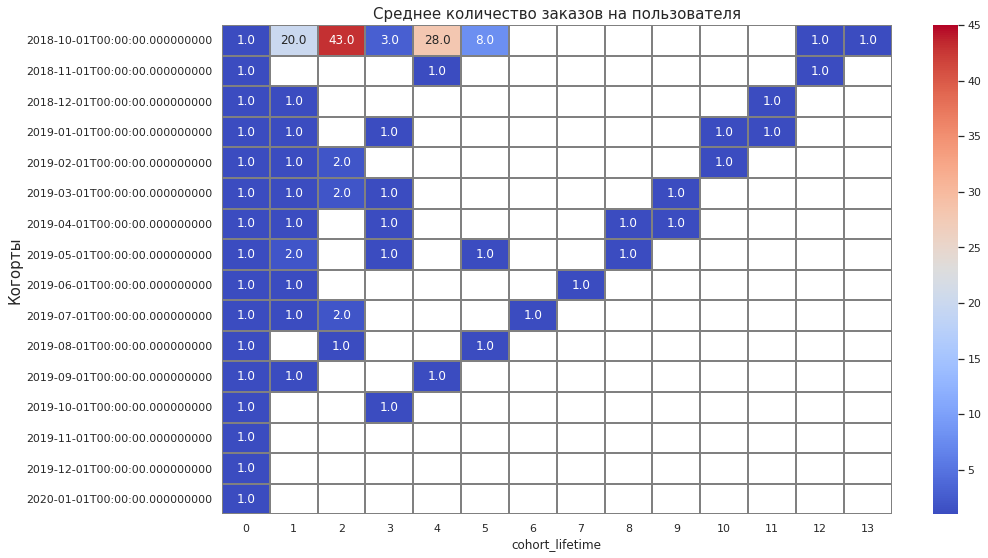

In [51]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Среднее количество заказов на пользователя', fontsize=15)
ax=sns.heatmap(orders_per_users, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=45)

#plt.xlabel('')
plt.ylabel('Когорты', fontsize=15)
plt.show()

Когорта 2018-10-01 показала высокие результаты (с ноября по март), что возможно связано с открытием магазина.

**Расчитаем среднюю выручку пользователя**

In [52]:
cohort_data_grouped.pivot_table(index='first_order_month', 
                                columns='order_month', 
                                values='revenue_per_user', 
                                aggfunc='mean').round(2).fillna('')

order_month       2018-10-01 2018-11-01  ... 2019-12-01 2020-01-01
first_order_month                        ...                      
2018-10-01           1952.98    24981.0  ...                      
2018-11-01                      1889.08  ...                      
2018-12-01                               ...                      
2019-01-01                               ...      145.0           
2019-02-01                               ...     708.49           
2019-03-01                               ...     829.67           
2019-04-01                               ...    1075.96     190.43
2019-05-01                               ...                407.41
2019-06-01                               ...                943.31
2019-07-01                               ...                540.06
2019-08-01                               ...                562.62
2019-09-01                               ...                811.24
2019-10-01                               ...                 116.0
2019-11-01                               ...                      
2019-12-01                               ...      306.5           
2020-01-01                               ...                 813.1

[16 rows x 16 columns]

In [53]:
#Построим сводную таблицу изменения средней выручки
revenue_per_user_pivot = cohort_data_grouped.pivot_table(index='first_order_month', 
                                                           columns='cohort_lifetime',
                                                           values='revenue_per_user',
                                                           aggfunc='mean').round(2)
revenue_per_user_pivot.fillna('')

cohort_lifetime         0        1        2   ...      11      12      13
first_order_month                             ...                        
2018-10-01         1952.98  24981.0  43993.0  ...           190.2  699.46
2018-11-01         1889.08                    ...          733.39        
2018-12-01         1330.91   2460.0           ...  412.97                
2019-01-01         1498.53  1561.67           ...   145.0                
2019-02-01         1065.94     83.5   1268.0  ...                        
2019-03-01         1072.35   989.86   2248.0  ...                        
2019-04-01         1348.77   2522.4           ...                        
2019-05-01         1372.85   1535.5           ...                        
2019-06-01         1507.43    679.5           ...                        
2019-07-01         1269.39    324.5   2068.0  ...                        
2019-08-01         1061.19             611.0  ...                        
2019-09-01         1031.72    270.0           ...                        
2019-10-01         1261.72                    ...                        
2019-11-01          391.25                    ...                        
2019-12-01          306.50                    ...                        
2020-01-01          813.10                    ...                        

[16 rows x 14 columns]

Cредняя выручка первой когорты 2018-10-01 резко возрастает в октябре и резко снижается к январю, затем сново резкий рост и спад

Определим 95-й и 99-й перцентили стоимости заказов

In [54]:
np.percentile(online_shop['price'], [95, 99])

array([2399., 5249.])

Всего 5% пользователей совершили покупки от 2399 у.е. 1% пользователей совершили покупки от 5249 у.е. Аномальными значениями будут покупки от 5249 у.е.

**Распределим количество покупок по месяцам**

In [55]:
purchase_counts = online_shop.groupby('month').agg({'order_id':'nunique'})\
                                     .reset_index().sort_values(by='order_id', ascending=False)
purchase_counts.columns = ['month', 'purchase_quantity']
purchase_counts.head(20)

month  purchase_quantity
4  2019-02-01                287
2  2018-12-01                284
15 2020-01-01                269
6  2019-04-01                267
5  2019-03-01                247
14 2019-12-01                246
0  2018-10-01                239
13 2019-11-01                217
1  2018-11-01                204
12 2019-10-01                203
9  2019-07-01                198
7  2019-05-01                181
11 2019-09-01                181
10 2019-08-01                173
3  2019-01-01                166
8  2019-06-01                160

In [56]:
trace = go.Bar(
    x = purchase_counts['month'], 
    y = purchase_counts['purchase_quantity'],
    marker_color='#220c74'
)
layout = go.Layout(
    title={
        'text': 'Распределение количества покупок по месяцам',
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Лидируют месяцы с декабрь по апрель, но в январе был небольшой провал.

**Определим количество покупателей в каждом месяце**

In [57]:
customer_count = online_shop.groupby('month')['customer_id'].nunique()\
                                     .reset_index().sort_values(by='customer_id', ascending=False)
customer_count.columns = ['month', 'customer_quantity']
customer_count.head(20)

month  customer_quantity
15 2020-01-01                269
14 2019-12-01                246
4  2019-02-01                245
6  2019-04-01                238
2  2018-12-01                233
5  2019-03-01                232
13 2019-11-01                217
9  2019-07-01                186
0  2018-10-01                180
1  2018-11-01                178
12 2019-10-01                174
11 2019-09-01                173
7  2019-05-01                167
10 2019-08-01                165
8  2019-06-01                151
3  2019-01-01                150

In [58]:
trace = go.Bar(
    x = customer_count['month'], 
    y = customer_count['customer_quantity'],
    marker_color='#530c74'
)
layout = go.Layout(
    title={
        'text': 'Распределение количества покупателей по месяцам',
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Магазин чаще всего посещают в декабре - перед новогодними праздниками, в феврале, марте и апреле для подготовки к новому дачному сезону

In [59]:
#Топ-10 самых дорогих товаров
display(online_shop.sort_values(by='price', ascending=False).head(10))
#Топ-10 покупателей с самой большой выручкой
online_shop.groupby('customer_id').agg({'revenue': 'sum'}).sort_values(by='revenue', ascending=False).head(10)

index                date  ... cohort_lifetime  first_order_month
4754   5992 2019-07-29 01:07:00  ...               0         2019-07-01
2753   2697 2019-04-05 01:09:00  ...               0         2019-04-01
2023   1981 2019-02-24 01:00:00  ...               0         2019-02-01
5126   7436 2020-01-26 01:09:00  ...               4         2019-09-01
3005   2997 2019-04-21 01:06:00  ...               0         2019-04-01
5426   6629 2019-10-16 01:05:00  ...               0         2019-10-01
2901   7190 2019-12-31 01:00:00  ...               8         2019-04-01
2380   2339 2019-03-14 01:08:00  ...               0         2019-03-01
4755   5994 2019-07-30 00:01:00  ...               0         2019-07-01
741     654 2018-11-05 02:02:00  ...               0         2018-11-01

[10 rows x 15 columns]

revenue
customer_id                                   
c971fb21-d54c-4134-938f-16b62ee86d3b  159508.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db   57278.0
58a4c3cc-504f-43ea-a74a-bae19e665552   53232.0
146cd9bf-a95c-4afb-915b-5f6684b17444   49432.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a   41900.0
8fba3604-ef57-4b9f-b2fe-3402fa8825c8   33680.0
6987e6d6-a63a-4ce2-a2d0-f424092d235e   32718.0
1b2764ad-9151-4051-a46a-9b01b62e6335   24370.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f   22056.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58   21361.0

Самые дорогие товары в интернет-магазине - сушилка уличная и сумки-тележки хозяйственные. Самая дорогая сушилка стоит 14 917 у.е.

Лидирует один покупатель с суммой 159 508.0 у.е.

**Вывод:**
Первый визит для совершения покупок был зафиксирован 27 января 2019 года в 01:07. Первая активность на платформе произошла 1 октября 2018 года, когда 181 покупатель совершил свои первые покупки. В среднем, ежедневно на платформе активны около 6 уникальных покупателей, а ежемесячно это число достигает 198 уникальных пользователей. Каждый день на двух покупателей приходится в среднем по 2 сессии.

Показатель удержания клиентов (Retention Rate) колеблется от 0.4% до 40.3%, при этом средний Retention Rate на второй месяц после привлечения составляет всего 1.36%. Это указывает на низкую жизненную ценность когорт и необходимость улучшения стратегии удержания клиентов, поскольку большинство пользователей не возвращаются на платформу после первого месяца.

В апреле 2019 года было зарегистрировано наибольшее количество покупателей, достигшее 225 человек, что привело к выручке в размере 382 481.66 у.е. Несмотря на большое количество покупателей, средний чек не был самым высоким. Когорта пользователей, привлеченных 1 октября 2018 года, показала высокие результаты с ноября по март, что, вероятно, связано с открытием магазина. Средняя выручка первой когорты резко возросла в октябре и снизилась к апрелю. Лишь 5% пользователей совершили покупки на сумму от 2399 у.е., и только 1% пользователей потратили более 5249 у.е., что является аномально высоким значением.

Распределение покупок по месяцам показывает, что наиболее активными периодами являются месяцы с декабря по апрель, за исключением небольшого спада в январе, что можно объяснить подготовкой к дачному сезону. Наибольший трафик в магазине наблюдается в декабре перед новогодними праздниками, а также в феврале, марте и апреле, когда покупатели готовятся к новому дачному сезону.

Наиболее дорогие товары в интернет-магазине включают уличные сушилки и хозяйственные сумки-тележки. Самая дорогая сушилка стоит 14 917 у.е. Лидером по объему покупок является один покупатель, который потратил 159 508 у.е.

## Сегментация покупателей на основе их покупок <a class="anchor" id="chapter3"></a>

**Определим уникальные наименования товаров**

In [60]:
unique_products = pd.DataFrame({'product': pd.unique(online_shop['product'])})
unique_products.sample(10)

product
1523  рассада пряной травы эвкалипт сильвердроп в го...
191   рассада зелени для кухни мелиссы в горшке диам...
870   новогоднее дерево ель канадская коника ртк 343...
1716  однолетнее растение виола в кассете по 4 шт, р...
615                   цветок искусственный крокус 20 см
1035               нож для овощей и мяса (5024) 1518004
419   лестница-стремянка dogrular ufuk al алюминевая...
1263  корзина для глаженного белья natural style пла...
1132       гладильная доска ника лина 1 112х34,5 см дл1
1670  окномойка с пластмассовой ручкой 42 см щетка 2...

In [61]:
# Сформируем выборку для словарей
online_shop['item'] = online_shop['product'].str.split().str[0]
online_shop[['item']].sample(n=10)

item
906            герань
3238           томата
3951           коврик
3851          рассада
5203        стремянка
2992  тряпкодержатель
1363           зубная
691             муляж
4689            ведро
2158       гладильная

In [62]:
# Количество уникальных товаров
num_unique_items = online_shop['item'].nunique()
print(num_unique_items)

461


### Разделение товаров на категории <a class="anchor" id="section_3_1"></a>

In [63]:
categories_garden = ['сушилка', 'гладильный', 'сумка', 'доска', 'горшок', 'сушилк', 'тележка', 'хозяйственный',\
               'искусственный', 'чехол', 'стремян', 'алюминиевый', 'черенок', 'кашпо', 'багажный', \
               'ведро', 'контейнер', 'швабра', 'ведро', 'мытье', 'крючок', 'обув', 'перчатк', 'ящик', 'лоток',\
               'набор','ковёр','термометр','урна','корзина','окномойка']

In [64]:
categories_plants = ['цветок', 'рассада', 'среднеспелый', 'томат', 'помидор', 'диам', 'пеларгония', 'розовый',\
          'зелень', 'роза', 'среднеспелый', 'муляж', 'однолетний', 'пластиковый', 'петуния', 'раннеспелый',\
          'растение', 'огурец', 'герань', 'тимьян', 'цикламен', 'калибрахоа', 'флокс', 'тыква', 'клубника',\
          'петрушка', 'фиалка', 'бегония', 'трава', 'флокс', 'перец', 'душица', 'комнатн', 'фуксия', 'капуста',\
          'дыня', 'хлорофитум', 'хризантема', 'зверобой', 'кореопсис', 'цветущее', 'лавр', 'ель', 'антуриум', 'укроп'\
          'осина', 'бадан', 'антинакипин', 'радермахер', 'хризолидокарпус', 'юкка', 'суккулент', \
          'цинерария', 'диффенбахий', 'эхинокактус', 'гипсофил', 'ранункулус', 'эхинацея', 'мускарь',\
          'горох', 'эхинокактус', 'табак', 'петрушка', 'шеффлер', 'многолетний', 'алиссум', 'бальзам', 'настурция',\
          'адиантум', 'кампануть', 'нолина', 'глоксиния', 'иссоп', 'сантолина', 'мелисса', \
          'космея', 'бархатцы', 'монарда', 'гортензия', 'диффенбахий', 'цинерария', 'шалфей', 'валериана', 'бадан',\
          'агератум', 'аргирантерум', 'вероника', 'целозия', 'сальвия', 'фатсия', 'хоста', 'монард', \
          'настольный', 'альбук', 'артемизия', 'калоцефалус', 'каллун', 'капсикум', 'соланум',\
          'бархатцы', 'годеция', 'эшшольция', 'пуансетия', 'кипарисовик', 'фиттоний', 'кодонант',\
          'калла', 'портулак', 'патиссон', 'эхеверие', 'хризантема', 'лаванда', 'кофе', 'овсянница',\
          'суккулент', 'драцена', 'морковь', 'годеция', 'эшшольция', 'комнатный', 'аптение', 'настурция', 'цветущий',\
          'девичий', 'лантан', 'ель', 'фикус', 'лен', 'лапчатка', 'рудбекия', 'цитрофортунелла', 'подсолнечник','вербена',\
          'георгина','циперус','декоративная','скиммия','пуансеттия','дендробиум','нефролепис','эхеверия','эвкалипт',\
          'мирт','молодило','гербера','розмарин','крассула','примула','каланхое','мята','дендробиум','мимоза','гвоздика',\
          'аптения','пуансеттия','муррайя','фиттония','алоэ вера','искусственная','базилик','примула','декабрист',\
          'крокусы','афеляндра','тюльпан','эпипремнум','осина','азалия','гиацинт','нивянник','салат рукола',\
          'хамедорея','калатея','платикодон','аспарагус','незабудка','аквилегия','замиокулькас','кампанула',\
          'диффенбахия','амариллис','пряные травы','астра', 'лилейник','энотера','пеперомия','земляника','цинния',\
          'наматрацник','лобелия','мускари','пиретрум','арбуз','баклажан','колокольчик','джункус','укроп',\
          'спатифиллум','физостегия','гардения','котовник','ясколка']

In [65]:
categories_kitchen_tools = ['luminarc', 'тарелк', 'салатник', 'чайник', 'салфетк', 'ложк', 'стакан', 'крышк', 'вилк', 'нож',\
           'сковород', 'кружк', 'термос', 'губка', 'измельчитель', 'миска', 'хлебница', 'сахарн', 'рыбочистка',\
           'соковарка', 'бидон', 'картофелемялка','орехоколка',  'скраб', 'венчик', 'сито',\
           'блюдо','tepмокружка','кухонный','миска','блюдце', \
           'скалка', 'завертка',  'толкушка', 'пружина', 'молодить', 'лопатка', 'скатерть' ,'петля','шнур','паста','электроштопор',\
            'мантоварка','миксер','кастрюля','весы','терка','кипятильник','овощеварка','ковш','соковыжималка']

In [66]:
categories_furniture = ['кухня', 'ванный', 'коврик', 'вешалк', 'потолочный', 'ванна', 'обеденн', 'щетк', 'карниз',\
             'таз', 'штора', 'зубн', 'коробк', 'полка', 'комод', 'лестниц', 'щетка', 'щётка', 'увлажнять',\
             'скоба', 'пресс', 'кольцо', 'фоторамка', 'ключница', 'перекладина', 'модульный', 'фал',   \
             'корыто', 'ковер', 'сидение', 'плед', 'полотенце', 'ваза', 'подушка', 'утюг', 'кисточка', 'шило',\
             'этажерка', 'стойка', 'стеллаж', 'нетканый', 'полк', 'моп', 'тряпкодержатель', 'шпагат', 'шприц', 'крышка',\
             'бензин', 'пробка', 'универсальный', 'сменный', 'кисточка', 'сетка', 'ручка', 'складной', 'просеиватель', 'отжим', \
             'вкладыш', 'стиральный', 'чистить', 'светильник', 'жидкий', 'пена', 'ножеточка', 'линейка', 'салфетница', 'овощечистка', \
             'держатель', 'губка', 'антижир', 'ролик', 'картофелемялка', 'ароматизированный', 'бальзам', 'рассекатель', 'ополаскиватель', \
             'скоба', 'пресс', 'кольцо', 'фоторамка', 'ключница', 'перекладина', 'модульный', 'фал', 'орехоколка', 'увлажнять', \
              'концентрат', 'смолевка', 'фиксатор', 'шар', 'обувница', 'штангенциркуль','совок', 'измерительный',\
             'сотейник', 'ванна', 'прищепок', 'отделитель', 'веревка', 'отбеливатель', 'решетка', 'запасный', 'уголок', 'тряпка', \
             'сахарница', 'половник', 'котел', 'готовый','кофр','сверло-фреза','холодная сварка','банка','пылесос','сверло',\
             'одеяло','ткань','многофункциональный','простыня','плечики','покрывало','сиденье','рукав','сменная',\
             'веник','основание','шпингалет']

**Определим количество товаров по категориям**

In [67]:
def categorize_product(product_name):
    if any(garden_item in product_name for garden_item in categories_garden):
        return "Товары для сада"
    elif any(plant_item in product_name for plant_item in categories_plants):
        return "Растения"
    elif any(kitchen_item in product_name for kitchen_item in categories_kitchen_tools):
        return "Кухонные принадлежности"
    elif any(furniture_item in product_name for furniture_item in categories_furniture):
        return "Товары для дома"
    else:
        return "Бытовая химия и товары для ванной "

online_shop['category'] = online_shop['product'].str.lower().apply(categorize_product)

online_shop.sample(n=10)

index                date  ...           item                 category
3444   3463 2019-05-08 01:03:00  ...      подвесное          Товары для сада
409     239 2018-10-13 01:06:00  ...     стеклянная  Кухонные принадлежности
581     446 2018-10-27 01:03:00  ...         коврик          Товары для дома
4079   4205 2019-05-31 02:02:00  ...        лобелия                 Растения
2427   2385 2019-03-18 01:09:00  ...     пеларгония                 Растения
4661   6037 2019-08-04 01:00:00  ...     пеларгония          Товары для сада
4143   4463 2019-06-04 01:01:00  ...     пеларгония          Товары для сада
5422   6623 2019-10-16 01:01:00  ...  сумка-тележка          Товары для сада
1406   1389 2018-12-27 01:01:00  ...       скатерть  Кухонные принадлежности
3290   3284 2019-04-29 01:03:00  ...        лобелия                 Растения

[10 rows x 17 columns]

**Отобразим количество по категориям**

In [68]:
# Число м процент айтемов в категории
category_counts = online_shop['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_percentage = online_shop['category'].value_counts(normalize=True).mul(100).round(2).reset_index()
category_percentage.columns = ['category', 'percentage']

In [69]:
category_stats = pd.merge(category_counts, category_percentage, on='category')
sorted_category_stats = category_stats.sort_values(by='percentage', ascending=False)

In [70]:
labels = sorted_category_stats['category']
values = sorted_category_stats['percentage']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title={
        'text': 'Категории товара',
        'y': 0.87,
        'x': 0.45
    }
)
fig.show()

Ожидаемо лидируют категории Растения 47,3% и Товары для сада 33,7%.

Определим самые продаваемые товары

In [71]:
top_products_by_quantity = online_shop.pivot_table(index='product', values='quantity', aggfunc='sum')
top_products_by_quantity = top_products_by_quantity.sort_values(by='quantity', ascending=False).head(15).reset_index()
top_products_by_quantity

product  quantity
0                           муляж яблоко 9 см красное       618
1    вешалки мягкие для деликатных вещей 3 шт шоколад       335
2       ручка-скоба рс-100 белая *трибатрон*, 1108035       201
3                муляж яблоко зеленый 9 см полиуретан       188
4                 крепеж для пружины дверной, 1107055       170
5   плечики пластмассовые размер 52 - 54 тула 1205158       160
6   пружина дверная 240 мм оцинкованная (д-19 мм) ...       150
7                 муляж банан желтый 21 см полиуретан       109
8   щетка-сметка 4-х рядная деревянная 300 мм (фиг...       105
9    ёрш унитазный с деревянной ручкой , ваир 1712012       103
10        щетка для посуды *оля*, мультипласт 1807010       101
11        стяжка оконная с болтом ст-55 цинк, 1108354       101
12   крепеж для пружины дверной оцинкованный, 1107054       100
13       щетка для мытья посуды колибри м5202 большая       100
14          шпингалет 80 мм белый с пружиной, 1102188       100

Самый продаваемый товар это муляж яблоко 9 см красное.

**Сгруппируем покупателей по количеству заказов**

In [72]:
# Подсчитаем количество уникальных заказов для каждого клиента
order_counts = online_shop.groupby('customer_id')['order_id'].nunique().reset_index()
order_counts.columns = ['customer_id', 'order_count']
sorted_order_counts = order_counts.sort_values(by='order_count', ascending=False)
print(sorted_order_counts.head())

                               customer_id  order_count
1897  c971fb21-d54c-4134-938f-16b62ee86d3b          126
732   4d93d3f6-8b24-403b-a74b-f5173e40d7db           35
1088  73d1cd35-5e5f-4629-8cf2-3fda829d4e58           17
1731  b7b865ab-0735-407f-8d0c-31f74d2806cc            7
17    0184f535-b60a-4914-a982-231e3f615206            5


In [73]:
# Создадим диаграмму размаха для количества заказов
box_plot = go.Figure()
box_plot.add_trace(go.Box(
    y=sorted_order_counts['order_count'],
    name="Заказы",
    boxpoints='outliers',
    marker=dict(color='#10d9b4'),
    line=dict(color='#220c74')
))

box_plot.update_layout(
    title={
        'text': 'Диаграмма размаха количества заказов',
        'y': 0.95,
        'x': 0.7,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
box_plot.show()

In [74]:
# Функция для категоризации количества заказов
def categorize_order_count(order_count):
    if order_count <= 1:
        return '1 заказ'
    elif order_count == 2:
        return '2 заказа'
    elif order_count == 3:
        return '3 заказа'
    elif order_count == 4:
        return '4 заказа'
    elif order_count == 5:
        return '5 заказов'
    elif order_count <= 10:
        return 'до 10 заказов'
    elif order_count <= 50:
        return 'до 50 заказов'
    elif order_count <= 100:
        return 'до 100 заказов'
    else:
        return 'более 100 заказов'
sorted_order_counts['order_quantity_category'] = sorted_order_counts['order_count'].apply(categorize_order_count)

In [75]:
histogram_fig = go.Figure()
histogram_fig.add_trace(go.Histogram(
    x=sorted_order_counts['order_quantity_category'],
    name="count",
    marker=dict(color='#220c74')
))

histogram_fig.update_layout(
    xaxis_title='Категории',
    yaxis_title='Величина',
    title={
        'text': 'Количество товаров по категориям',
        'y': 0.88,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    showlegend=True
)
histogram_fig.show()

In [76]:
# Рассчитаем процентное распределение категорий количества заказов
category_distribution = sorted_order_counts['order_quantity_category'].value_counts(normalize=True).mul(100).reset_index()
category_distribution.columns = ['Категория', '% по категории']

# Отсортируем категории по проценту в порядке убывания
sorted_category_distribution = category_distribution.sort_values(by='% по категории', ascending=False)
print(sorted_category_distribution)

           Категория  % по категории
0            1 заказ       63.565253
1           2 заказа       35.282009
2           3 заказа        0.823384
3           4 заказа        0.123508
4      до 50 заказов        0.082338
5      до 10 заказов        0.041169
6          5 заказов        0.041169
7  более 100 заказов        0.041169


63.3 % покупателей совершили по 1 заказу, а 2 заказа - 35.5 %.

**Изменение выручки по месяцам**

In [77]:
# Создание сводной таблицы для суммы выручки по месяцам и категориям
monthly_revenue = online_shop.groupby(['month', 'category'])['revenue'].sum().unstack()
print(monthly_revenue)

category    Бытовая химия и товары для ванной   ...  Товары для сада
month                                           ...                 
2018-10-01                        14076.000000  ...    195512.000000
2018-11-01                         5196.000000  ...    222300.000000
2018-12-01                         2130.000000  ...    219635.000000
2019-01-01                          224.000000  ...     78279.000000
2019-02-01                         7560.000000  ...    179411.000000
2019-03-01                         8807.000000  ...    141071.000000
2019-04-01                          493.000000  ...    160254.000000
2019-05-01                         1399.000000  ...    103052.000000
2019-06-01                         5184.000000  ...     90162.000000
2019-07-01                         1598.000000  ...    142897.000000
2019-08-01                         2682.000000  ...    113659.000000
2019-09-01                         6903.000000  ...     92374.000000
2019-10-01                        

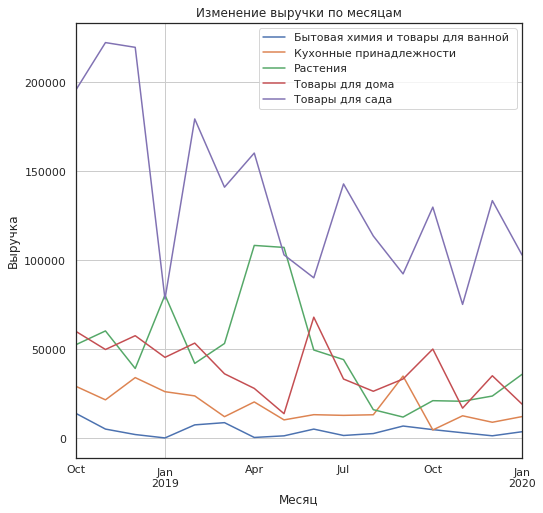

In [78]:
# Построение графика изменения выручки по месяцам и категориям
fig, ax = plt.subplots(figsize=(8, 8))
monthly_revenue.plot(kind='line', ax=ax, grid=True)

# Настройка заголовка и меток осей
ax.set_title('Изменение выручки по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
ax.legend(loc='best')
plt.show()

**Вывод:**
Категория "растения" показала наивысший спрос в апреле и мае, что объясняется началом дачного сезона, когда садоводы и огородники активно приобретают посадочный материал и садовые принадлежности.

Товары для дома достигли пика продаж в июне, что связано с началом отпускного сезона. В это время многие люди занимаются домашними делами, включая небольшие ремонты и обновления интерьера, что объясняет высокий спрос на данную категорию.

Категория "товары для сада" показала повышенный спрос в декабре, марте и июне. Пик в декабре может быть связан с покупкой садовых аксессуаров и инструментов в качестве подарков на праздники. В марте начинается подготовка к весенне-летнему сезону, что также способствует увеличению продаж. В июне спрос на садовые товары снова возрастает, поскольку люди активно занимаются благоустройством своих участков.

Кухонные принадлежности пользовались наибольшим спросом в ноябре, что может быть связано с подготовкой к праздникам, когда люди закупаются новыми кухонными инструментами и аксессуарами для приготовления праздничных блюд.

**Изменение количества уникальных покупок по месяцам**

In [79]:
# Создание сводной таблицы для подсчета уникальных заказов по месяцам и категориям
unique_orders_per_month = online_shop.groupby(['month', 'category'])['order_id'].nunique().unstack()
unique_orders_per_month

category    Бытовая химия и товары для ванной   ...  Товары для сада
month                                           ...                 
2018-10-01                                  11  ...              129
2018-11-01                                   7  ...               98
2018-12-01                                   7  ...              126
2019-01-01                                   1  ...               66
2019-02-01                                  10  ...              151
2019-03-01                                  11  ...              126
2019-04-01                                   2  ...              133
2019-05-01                                   9  ...               85
2019-06-01                                   7  ...               79
2019-07-01                                   6  ...              103
2019-08-01                                   4  ...               93
2019-09-01                                  10  ...               89
2019-10-01                                  10  ...               98
2019-11-01                                   8  ...               63
2019-12-01                                   6  ...               84
2020-01-01                                   6  ...               83

[16 rows x 5 columns]

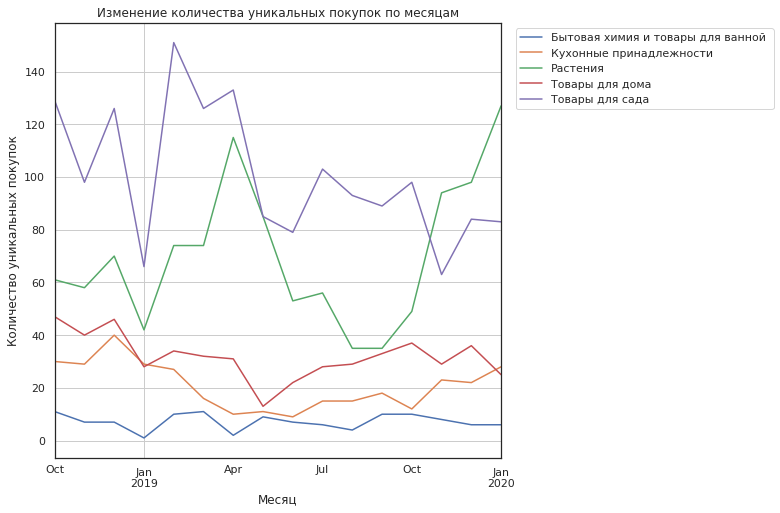

In [80]:
# Построение графика изменения количества уникальных покупок по месяцам и категориям
fig, ax = plt.subplots(figsize=(8, 8))
unique_orders_per_month.plot(kind='line', ax=ax, grid=True)

# Настройка заголовка и меток осей
ax.set_title('Изменение количества уникальных покупок по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество уникальных покупок')
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Анализируя данные о уникальных покупках, можно отметить, что в феврале наибольшее количество заказов приходится на категорию "товары для сада". Это свидетельствует о высоком спросе перед началом весеннего сезона, когда люди активно готовят свои сады и огороды к предстоящим работам на открытом воздухе.

Категория "растения" демонстрирует наибольшую популярность в апреле, что совпадает с началом дачного сезона и интенсивными посадочными работами. Однако к октябрю наблюдается значительное снижение спроса на растения, связанное с завершением сезона садоводства.

Январь характеризуется общим спадом покупок по всем категориям товаров. Это может быть обусловлено постпраздничной тишиной, когда потребители уже потратили значительные суммы на новогодние и рождественские праздники и временно снижают свою покупательскую активность.

В апреле, помимо категории "растения", также отмечается рост покупок в категориях "другие", "кухонные принадлежности" и "товары для дома". Этот всплеск может быть связан с весенними праздниками и обновлением домашнего интерьера.

С октября по январь также наблюдается увеличение продаж в категориях "другие", "кухонные принадлежности" и "товары для дома". Этот период включает в себя осенние и зимние праздники, когда потребители активно готовятся к праздничным сезонам, делая покупки для подготовки дома и кухни.

**Изменение количества уникальных покупателей по месяцам**

In [81]:
# Создание сводной таблицы для подсчета уникальных покупателей по месяцам и категориям
monthly_unique_customers = online_shop.groupby(['month', 'category'])['customer_id'].nunique().unstack()
monthly_unique_customers

category    Бытовая химия и товары для ванной   ...  Товары для сада
month                                           ...                 
2018-10-01                                  11  ...               97
2018-11-01                                   7  ...               86
2018-12-01                                   7  ...              109
2019-01-01                                   1  ...               59
2019-02-01                                   9  ...              126
2019-03-01                                  11  ...              120
2019-04-01                                   2  ...              120
2019-05-01                                   8  ...               81
2019-06-01                                   6  ...               78
2019-07-01                                   6  ...               96
2019-08-01                                   4  ...               88
2019-09-01                                   9  ...               88
2019-10-01                                   9  ...               84
2019-11-01                                   8  ...               63
2019-12-01                                   6  ...               84
2020-01-01                                   6  ...               83

[16 rows x 5 columns]

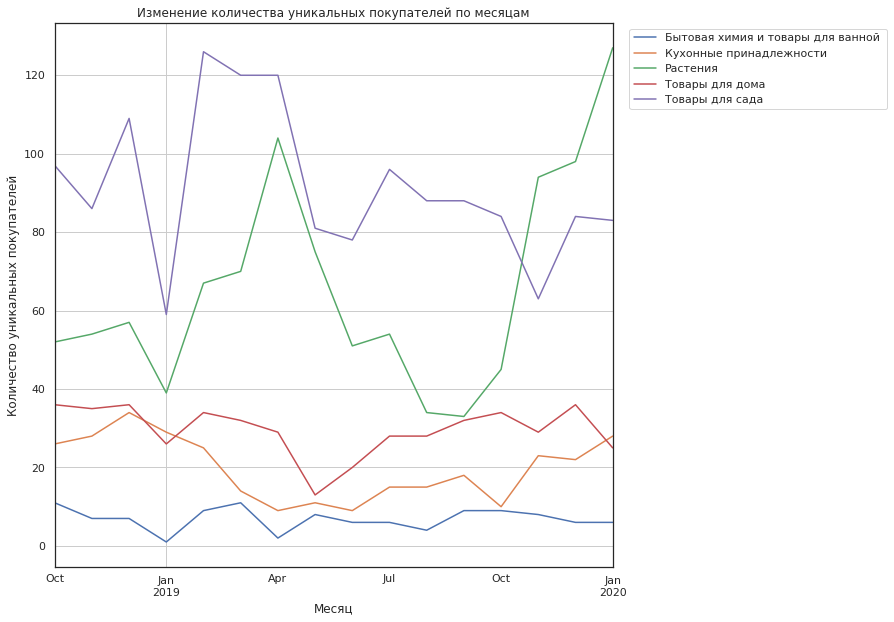

In [82]:
# Построение графика изменения количества уникальных покупателей по месяцам и категориям
fig, ax = plt.subplots(figsize=(10, 10))
monthly_unique_customers.plot(ax=ax, grid=True)
ax.set_title('Изменение количества уникальных покупателей по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество уникальных покупателей')
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

У всех категория рост в апреле по покупкам, и провалы в январе.

**Вывод:**

Товары были классифицированы на четыре основные категории: "Товары для сада", "Растения", "Кухонные принадлежности" и "Товары для дома", а также "Бытовая химия и товары для ванной". Среди всех категорий наибольшей популярностью среди покупателей пользовались "Растения" и "Товары для сада". Однако, несмотря на высокую частоту покупок в категории "Растения", средний чек в этой категории оказался самым низким.

Наибольшую выручку принесли категории "Товары для сада" и "Товары для дома". Эти категории показали высокую доходность благодаря более высоким ценам на товары и значительному спросу со стороны покупателей.

Из анализа поведения покупателей следует, что 63% из них совершили только один заказ, в то время как 35% вернулись и сделали два заказа. Это свидетельствует о том, что большинство клиентов пока не проявляют лояльность, однако значительная часть из них возвращается для повторных покупок.

Таким образом, несмотря на высокую частоту покупок в категории "Растения", основной вклад в общую выручку вносят категории "Товары для сада" и "Товары для дома" благодаря более высокому среднему чеку за покупку.

### RFM анализ, сегментация клиентов <a class="anchor" id="section_3_2"></a>

**Recency** — количество дней с последней покупки.
**Frequency** — количество покупок.
**Monetary** — сумма всех покупок.

In [83]:
# Установим текущую дату для расчета давности (Recency)
current_date = pd.to_datetime('2020-01-31')
# Вычисление метрик RFM
rfm = online_shop.groupby('customer_id').agg({
    'date': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'total_price': 'sum'  # Monetary
}).reset_index()

# Переименование колонок
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

rfm

customer_id  recency  frequency  monetary
0     000d6849-084e-4d9f-ac03-37174eaf60c4      106          1     555.0
1     001cee7f-0b29-4716-b202-0042213ab038      348          1     442.0
2     00299f34-5385-4d13-9aea-c80b81658e1b      108          1     914.0
3     002d4d3a-4a59-406b-86ec-c3314357e498      368          1    1649.0
4     003bbd39-0000-41ff-b7f9-2ddaec152037      123          1    2324.0
...                                    ...      ...        ...       ...
2424  ff601403-b094-4b86-9ac6-264d725b9277       11          2    1739.0
2425  ffaeab76-3a8d-49ee-860f-17273b2fc8a2       92          1     397.0
2426  ffb5976a-7a4d-460b-95c4-5ffaba31cb24      412          1     389.0
2427  ffb80538-3fda-4351-8ea9-9d2bec58bb07      143          1     974.0
2428  ffe82299-3f5b-4214-87fe-3d36ecccfac3      100          1     577.0

[2429 rows x 4 columns]

In [84]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

recency  frequency  monetary
0.25     72.0        1.0     389.0
0.50    209.0        1.0     838.0
0.75    343.0        2.0    1798.0

In [85]:
# Создание копии данных
RFM_Segment = rfm.copy()

# Определение квантилей для recency, frequency и monetary
quantiles = RFM_Segment.quantile(q=[0.25, 0.5, 0.75]).to_dict()

# Функция для классификации recency
def R_Class(x, quantiles):
    if x <= quantiles['recency'][0.25]:
        return 4
    elif x <= quantiles['recency'][0.50]:
        return 3
    elif x <= quantiles['recency'][0.75]: 
        return 2
    else:
        return 1
    
# Функция для классификации frequency и monetary
def FM_Class(x, metric, quantiles):
    if x <= quantiles[metric][0.25]:
        return 1
    elif x <= quantiles[metric][0.50]:
        return 2
    elif x <= quantiles[metric][0.75]: 
        return 3
    else:
        return 4

# Применение классификации
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=(quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency', quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary'].apply(FM_Class, args=('monetary', quantiles,))

# Создание RFM класса
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) + RFM_Segment.F_Quartile.map(str) + RFM_Segment.M_Quartile.map(str)

# Суммирование для получения общей оценки вовлеченности клиента
RFM_Segment['RFM_Score_sum'] = RFM_Segment[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Классификация клиентов на группы
def classify_customer(score):
    if score <= 3:
        return 'Top Customer'
    elif score <= 6:
        return 'Medium value customer'
    elif score <= 9:
        return 'Low-value customer'
    else:
        return 'Lost Customer'

RFM_Segment['Customer_segment'] = RFM_Segment['RFM_Score_sum'].apply(classify_customer)

# Вывод результатов
print(RFM_Segment)

                               customer_id  ...       Customer_segment
0     000d6849-084e-4d9f-ac03-37174eaf60c4  ...  Medium value customer
1     001cee7f-0b29-4716-b202-0042213ab038  ...  Medium value customer
2     00299f34-5385-4d13-9aea-c80b81658e1b  ...     Low-value customer
3     002d4d3a-4a59-406b-86ec-c3314357e498  ...  Medium value customer
4     003bbd39-0000-41ff-b7f9-2ddaec152037  ...     Low-value customer
...                                    ...  ...                    ...
2424  ff601403-b094-4b86-9ac6-264d725b9277  ...          Lost Customer
2425  ffaeab76-3a8d-49ee-860f-17273b2fc8a2  ...  Medium value customer
2426  ffb5976a-7a4d-460b-95c4-5ffaba31cb24  ...           Top Customer
2427  ffb80538-3fda-4351-8ea9-9d2bec58bb07  ...     Low-value customer
2428  ffe82299-3f5b-4214-87fe-3d36ecccfac3  ...  Medium value customer

[2429 rows x 10 columns]


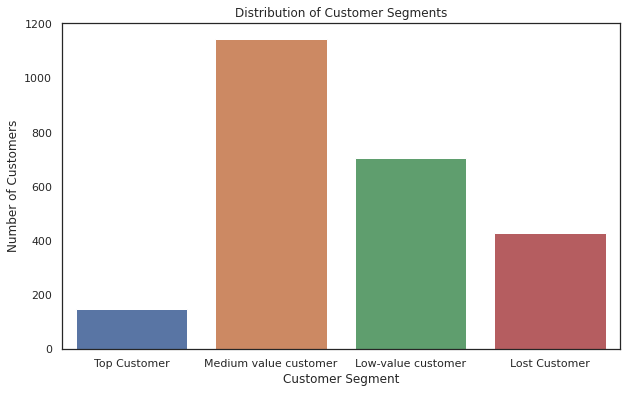

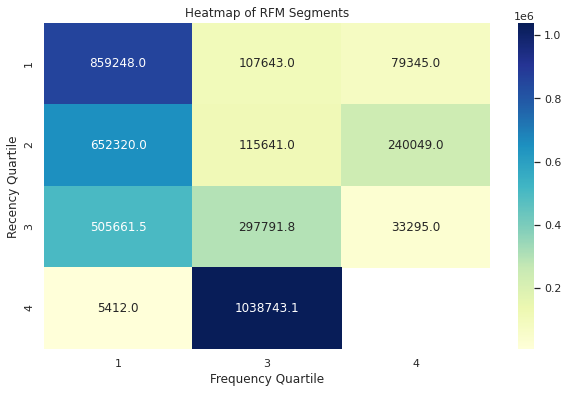

In [86]:
# Подсчет количества клиентов в каждом RFM-классе
RFM_Segment['Customer_segment'] = RFM_Segment['RFM_Score_sum'].apply(classify_customer)

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_segment', data=RFM_Segment, order=['Top Customer', 'Medium value customer', 'Low-value customer', 'Lost Customer'])
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

# Построение тепловой карты
rfm_heatmap = RFM_Segment.pivot_table(index='R_Quartile', columns='F_Quartile', values='monetary', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of RFM Segments')
plt.xlabel('Frequency Quartile')
plt.ylabel('Recency Quartile')
plt.show()

**Вывод:**

**Top Customer**: Сегмент с наименьшим числом клиентов. Это показывает, что лишь небольшое количество клиентов имеют высокие оценки по всем трем показателям (recency, frequency, monetary).

**Medium Value Customer**: Самый многочисленный сегмент. Большинство клиентов находятся в средней категории по всем трем показателям. Это означает, что у большинства клиентов умеренные значения для recency, frequency и monetary.

**Low-Value Customer**: Достаточно крупный сегмент. Значительное количество клиентов имеет низкие значения по одному или нескольким из трех показателей, что указывает на низкую вовлеченность.

**Lost Customer**: Сегмент с меньшим числом клиентов, чем в "Medium" и "Low-Value", но больше, чем в "Top Customer". Эти клиенты имеют низкие оценки по всем трем показателям и требуют внимания для повторного вовлечения.

**Частые, но не недавние покупки (R_Quartile 4 и F_Quartile 3):**
Высокая сумма денежных затрат (1,038,743.1). Это показывает, что клиенты, которые давно не делали покупки, но ранее покупали часто, вносят значительный вклад в выручку.

**Недавние и частые покупки (R_Quartile 1 и F_Quartile 1):**
Также значительная сумма денежных затрат (859,248.0). Эти клиенты делают недавние и частые покупки, и они также являются важными для выручки.

Средние значения по другим группам:
Например, R_Quartile 2 и F_Quartile 2 (115,641.0) или R_Quartile 3 и F_Quartile 3 (297,791.8) показывают умеренные значения выручки.
Низкая активность (R_Quartile 4 и F_Quartile 1):
Клиенты с высокой частотой покупок в прошлом, но неактивные в последнее время, вносят очень низкий вклад в выручку (5,412.0).

**Анализ основных метрик по сегментам**

In [87]:
# Объединяем датафреймы по столбцу 'customer_id'
merged_data = pd.merge(online_shop, RFM_Segment, on='customer_id')

# Группировка по сегментам покупателей
segment_analysis = merged_data.groupby('Customer_segment').agg(
    avg_order_value=('revenue', 'mean'),  # Средний чек
    avg_quantity=('quantity', 'mean'),    # Среднее количество товаров
    total_revenue=('revenue', 'sum'),     # Общая выручка
    num_customers=('customer_id', 'nunique'),  # Количество уникальных клиентов
).reset_index()

# Добавляем столбец средней выручки на одного клиента
segment_analysis['avg_revenue_per_customer'] = segment_analysis['total_revenue'] / segment_analysis['num_customers']

segment_analysis

Customer_segment  ...  avg_revenue_per_customer
0          Lost Customer  ...               3264.399419
1     Low-value customer  ...               1828.612293
2  Medium value customer  ...               1055.619546
3           Top Customer  ...                219.905405

[4 rows x 6 columns]

**Создание сводной таблицы для суммы цены за заказ**

In [88]:
price_sum = online_shop.groupby("order_id")["price"].sum().reset_index()
price_sum.columns = ['order_id', 'price_by_order']
top_orders = price_sum.sort_values('price_by_order', ascending=False).head(10)
top_orders

order_id  price_by_order
502      68760         17060.0
2246     72139         14917.0
349      68529          8758.0
1699     71035          8737.0
1375     70423          8437.0
3306    109758          8077.0
1800     71227          8077.0
2699     72992          7724.0
3193    107812          7679.0
2247     72140          7679.0

**Определение количества товаров, купленных каждым покупателем**

In [89]:
quantity_count = online_shop.groupby("customer_id")["quantity"].sum().reset_index()
quantity_count.columns = ['customer_id', 'item_count']
top_customers = quantity_count.sort_values('item_count', ascending=False).head(10)
top_customers

customer_id  item_count
197   146cd9bf-a95c-4afb-915b-5f6684b17444         334
1897  c971fb21-d54c-4134-938f-16b62ee86d3b         334
732   4d93d3f6-8b24-403b-a74b-f5173e40d7db         309
1934  cd09ea73-d9ce-48c3-b4c5-018113735e80         300
862   5d189e88-d4d6-4eac-ab43-fa65a3c4d106         300
1569  a984c5b7-ff7e-4647-b84e-ef0b85a2762d         200
1578  aa42dc38-780f-4b50-9a65-83b6fa64e766         170
974   685d3d84-aebb-485b-8e59-344b3df8b3d3         150
124   0c5aaa88-e346-4f87-8f7a-ad8cbc04e965         140
1346  8fba3604-ef57-4b9f-b2fe-3402fa8825c8         101

**Расчет выручки на каждого покупателя**

In [90]:
online_shop['revenue'] = online_shop['price'] * online_shop['quantity']
revenue_customer = online_shop.groupby("customer_id")["revenue"].sum().reset_index()
revenue_customer.columns = ['customer_id', 'revenue_by_customer']
top_revenue_customers = revenue_customer.sort_values('revenue_by_customer', ascending=False).head(10)
top_revenue_customers

customer_id  revenue_by_customer
1897  c971fb21-d54c-4134-938f-16b62ee86d3b             159508.0
732   4d93d3f6-8b24-403b-a74b-f5173e40d7db              57278.0
827   58a4c3cc-504f-43ea-a74a-bae19e665552              53232.0
197   146cd9bf-a95c-4afb-915b-5f6684b17444              49432.0
689   498f12a4-6a62-4725-8516-cf5dc9ab8a3a              41900.0
1346  8fba3604-ef57-4b9f-b2fe-3402fa8825c8              33680.0
981   6987e6d6-a63a-4ce2-a2d0-f424092d235e              32718.0
265   1b2764ad-9151-4051-a46a-9b01b62e6335              24370.0
1491  9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f              22056.0
1088  73d1cd35-5e5f-4629-8cf2-3fda829d4e58              21361.0

## Выдвижение и проверка сатистических гипотез <a class="anchor" id="chapter4"></a>

Определим статистическую значимость различий в средней выручке между кластерами

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой:

**Н0 - Статистически значимых различий в средней выручке заказа нет**

**Н1 - Статистически значимые различия в средней выручке заказа есть**

Определим статистическую значимость различий в частоте заказов между кластерами

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой:

**Н0 - Статистически значимых различий в частоте заказов нет**

**Н1 - Статистически значимые различия в частоте заказов есть**

Проведем тест «U-критерий Манна-Уитни»

In [91]:
# Подготовка данных для теста Манна-Уитни
monetary_values = RFM_Segment[['Customer_segment', 'monetary']]
frequency_values = RFM_Segment[['Customer_segment', 'frequency']]

# Список сегментов
segments = RFM_Segment['Customer_segment'].unique()

# Проведение теста Манна-Уитни для каждой пары сегментов
pvals_monetary = []
pvals_frequency = []

for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        seg1 = segments[i]
        seg2 = segments[j]
        
        # Манна-Уитни для средней выручки
        u_stat_monetary, pval_monetary = stats.mannwhitneyu(
            monetary_values[monetary_values['Customer_segment'] == seg1]['monetary'],
            monetary_values[monetary_values['Customer_segment'] == seg2]['monetary'],
            alternative='two-sided'
        )
        pvals_monetary.append(pval_monetary)
        
        # Манна-Уитни для количества товаров
        u_stat_frequency, pval_frequency = stats.mannwhitneyu(
            frequency_values[frequency_values['Customer_segment'] == seg1]['frequency'],
            frequency_values[frequency_values['Customer_segment'] == seg2]['frequency'],
            alternative='two-sided'
        )
        pvals_frequency.append(pval_frequency)

# Поправка Бенферрони для множественных тестов
all_pvals = pvals_monetary + pvals_frequency
reject, pvals_corrected, _, _ = multipletests(all_pvals, alpha=0.05, method='bonferroni')

# Печать результатов
print('Значения p после поправки Бонферрони для средней выручки:', pvals_corrected[:len(pvals_monetary)])
print('Отвергнуть нулевую гипотезу для средней вырчки показателей:', reject[:len(pvals_monetary)])

print('Значения p после поправки Бонферрони для частоты заказов:', pvals_corrected[len(pvals_monetary):])
print('Отвергнуть нулевую гипотезу для частоты заказов:', reject[len(pvals_monetary):])

Значения p после поправки Бонферрони для средней выручки: [4.02438104e-022 1.10988099e-118 7.15562741e-039 1.73751464e-044
 2.27612830e-056 1.31367680e-072]
Отвергнуть нулевую гипотезу для средней вырчки показателей: [ True  True  True  True  True  True]
Значения p после поправки Бонферрони для частоты заказов: [2.10976782e-176 0.00000000e+000 7.71908089e-001 3.27535535e-045
 1.66497477e-039 6.18721968e-119]
Отвергнуть нулевую гипотезу для частоты заказов: [ True  True False  True  True  True]


**Вывод:**

Средняя выручка
Значения p после поправки Бонферрони для средней выручки:

[4.02438104e-022, 1.10988099e-118, 7.15562741e-039, 1.73751464e-044, 2.27612830e-056, 1.31367680e-072]

Отвергнуть нулевую гипотезу для средней выручки:

[True, True, True, True, True, True]

На основании значений p после поправки Бонферрони, все значения значительно меньше уровня значимости (обычно 0.05). Это означает, что мы отвергаем нулевую гипотезу для всех пар средних выручек. Следовательно, можно заключить, что средняя выручка значительно различается между сегментами клиентов. Все сегменты имеют статистически значимые различия в средней выручке.

Частота заказов
Значения p после поправки Бонферрони для частоты заказов:

[2.10976782e-176, 0.00000000e+000, 7.71908089e-001, 3.27535535e-045, 1.66497477e-039, 6.18721968e-119]

Отвергнуть нулевую гипотезу для частоты заказов:

[True, True, False, True, True, True]

На основании значений p после поправки Бонферрони, все значения, кроме одного (0.771908089), значительно меньше уровня значимости (обычно 0.05). Это означает, что мы отвергаем нулевую гипотезу для всех пар частот заказов, за исключением одной. Следовательно, можно заключить, что частота заказов значительно различается между сегментами клиентов, за исключением одного случая, где частоты заказов статистически незначимы.

Общие выводы
Средняя выручка: Все сегменты клиентов имеют статистически значимые различия в средней выручке. Это указывает на то, что разные сегменты клиентов тратят разные суммы денег.
Частота заказов: Большинство сегментов клиентов имеют статистически значимые различия в частоте заказов, за исключением одной пары, где различия незначимы. Это говорит о том, что большинство сегментов клиентов делают заказы с разной частотой, хотя есть исключения.

## Рассмотрение категорий товаров и сезонности через призму сегментов <a class="anchor" id="chapter1"></a>

### Категории товаров по сегментам <a class="anchor" id="section_5_1"></a>

Customer_segment                            category        revenue
0           Lost Customer  Бытовая химия и товары для ванной    21780.333333
1           Lost Customer             Кухонные принадлежности   82406.000000
2           Lost Customer                            Растения  167800.333333
3           Lost Customer                     Товары для дома  174509.000000
4           Lost Customer                     Товары для сада  957196.083333
5      Low-value customer  Бытовая химия и товары для ванной    21624.000000
6      Low-value customer             Кухонные принадлежности  112152.000000
7      Low-value customer                            Растения  292726.500000
8      Low-value customer                     Товары для дома  250582.000000
9      Low-value customer                     Товары для сада  612087.166667
10  Medium value customer  Бытовая химия и товары для ванной    25318.000000
11  Medium value customer             Кухонные принадлежности   91847.000000
12  Medium value customer                            Растения  293223.500000
13  Medium value customer                     Товары для дома  197985.000000
14  Medium value customer                     Товары для сада  601366.500000
15           Top Customer  Бытовая химия и товары для ванной      691.000000
16           Top Customer             Кухонные принадлежности    4618.000000
17           Top Customer                            Растения   13395.000000
18           Top Customer                     Товары для дома    4296.000000
19           Top Customer                     Товары для сада    9546.000000

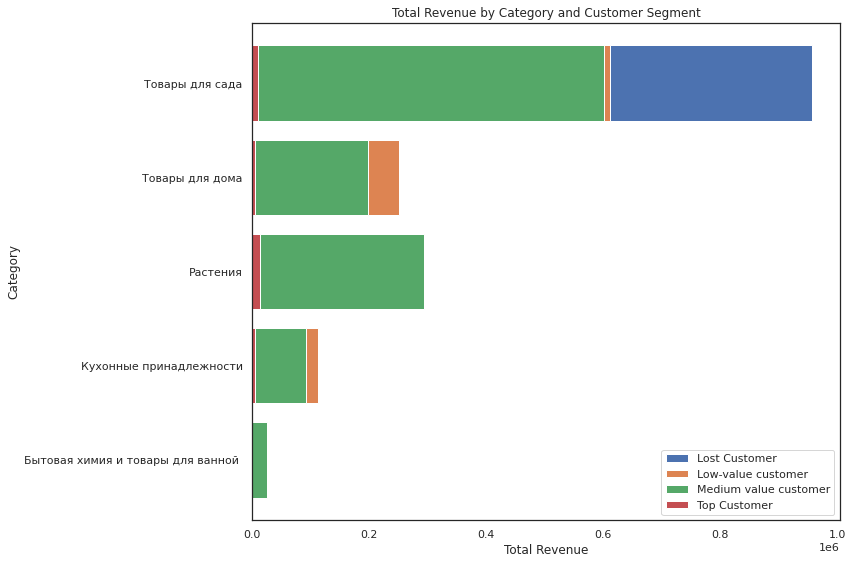

In [92]:
# Объединение таблиц по customer_id
merged_data = pd.merge(online_shop, RFM_Segment[['customer_id', 'Customer_segment']], on='customer_id', how='inner')
# Группировка и агрегация данных
segment_category_revenue = merged_data.groupby(['Customer_segment', 'category'])['revenue'].sum().reset_index()

display(segment_category_revenue)

# Визуализация выручки по категориям для каждого сегмента покупателей
plt.figure(figsize=(12, 8))
for segment in segment_category_revenue['Customer_segment'].unique():
    segment_data = segment_category_revenue[segment_category_revenue['Customer_segment'] == segment]
    plt.barh(segment_data['category'], segment_data['revenue'], label=segment)

plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.title('Total Revenue by Category and Customer Segment')
plt.legend()
plt.tight_layout()
plt.show()

**Вывод:**

Анализ данных показывает, что товары для сада являются наиболее прибыльной категорией среди всех остальных. Это указывает на сильный интерес потребителей к этим товарам. Особенно заметен значительный вклад Lost Customer в общую выручку от этой категории, что подчеркивает необходимость разработки стратегий для удержания таких клиентов.

Вторым по выручке является сегмент растений, преимущественно благодаря клиентам средней стоимости. Это свидетельствует о прочной базе клиентов Medium value customer, способных значительно влиять на выручку в данной категории.

Товары для дома и кухонные аксессуары показывают умеренные показатели выручки, с важным вкладом как клиентов Medium value customer, так и Low-value customer.

Кухонные пренадлежности опираются на такие сегменты как:  Medium value customer и Low-value customer но в меньшей мере

Наименьшую выручку приносят бытовая химия и продукты для ванной, где основной вклад в выручку также вносят клиенты  Medium value customer.

Тренды:

Товары для сада доминируют среди всех категорий благодаря высокой выручке, что свидетельствует о сильном интересе потребителей.

Значительная часть выручки от товаров для сада приходится на Lost Customer, что подтверждает необходимость стратегий для их удержания.

Сегмент растений, особенно благодаря клиентам Medium value customer, является важным драйвером выручки, подчеркивающим стабильность среднего уровня клиентов в данной категории.

Сравнение выручки:

Товары для сада значительно превосходят по выручке все остальные категории, что указывает на значительные возможности для целевого маркетинга и стратегий удержания клиентов.

Категория растений показывает более высокие результаты выручки по сравнению с товарами для дома и кухонными аксессуарами, которые имеют схожие показатели, но различный вклад клиентских сегментов.

Прогнозы:

Товары для сада обладают значительным потенциалом для роста при реализации стратегий возврата потерянных клиентов.

Стабильное присутствие клиентов Medium value customer в категории растений и других сегментах указывает на устойчивый источник выручки с возможностями для увеличения продаж через дополнительные предложения и кросс-продажи.

Товары для сада имеют высокий потенциал выручки, но требуют улучшения стратегий удержания клиентов.

Сегмент клиентов Medium value customer является ключевым для различных категорий, особенно в категории растений.

### Сезонность товаров <a class="anchor" id="section_5_1"></a>

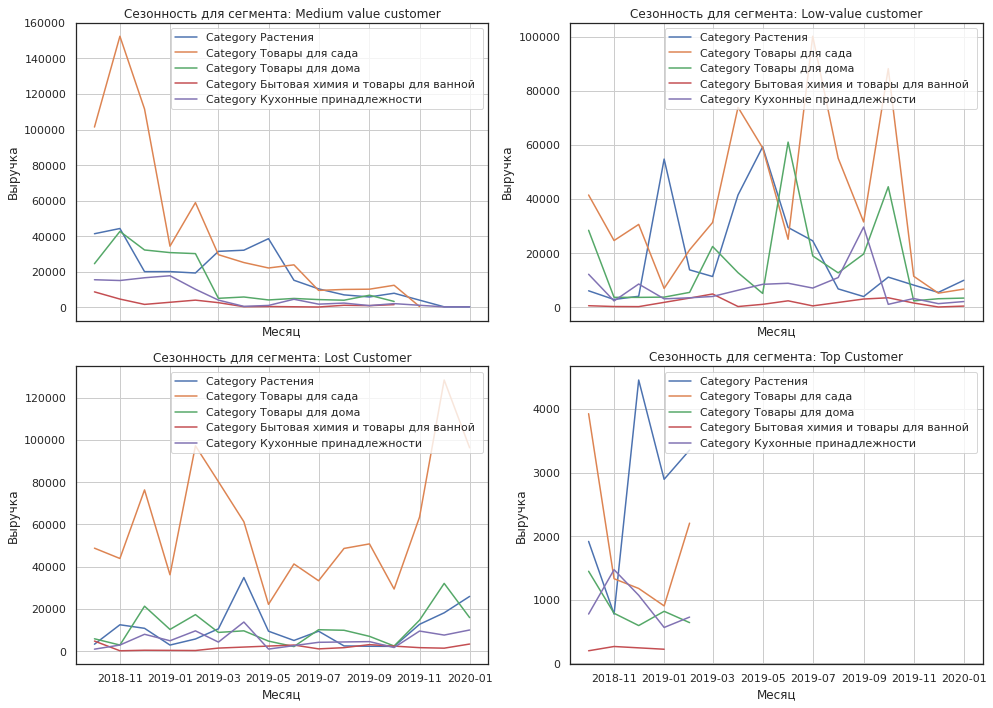

In [93]:
# Объединение таблиц по customer_id
merged_data = pd.merge(online_shop, RFM_Segment[['customer_id', 'Customer_segment']], on='customer_id', how='inner')

# Группировка данных по Customer_segment, категориям товаров и месяцам
category_seasonality = merged_data.groupby(['Customer_segment', 'category', 'month']).agg({
    'revenue': 'sum',
}).reset_index()

# Получение уникальных значений категорий и Customer_segment
categories = merged_data['category'].unique()
customer_segments = merged_data['Customer_segment'].unique()

# Настройка подграфиков
num_segments = len(customer_segments)
num_cols = 2  # Количество столбцов
num_rows = (num_segments + num_cols - 1) // num_cols  # Количество строк

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows), sharex=True)

# Построение графиков
for i, segment in enumerate(customer_segments):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    for category in categories:
        subset = category_seasonality[(category_seasonality['Customer_segment'] == segment) & 
                                      (category_seasonality['category'] == category)]
        ax.plot(subset['month'], subset['revenue'], label=f'Category {category}')

    ax.set_title(f'Сезонность для сегмента: {segment}')
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Выручка')
    ax.grid(True)
    ax.legend(loc='upper right')

# Удаление пустых подграфиков, если количество сегментов не кратно количеству столбцов
if num_segments % num_cols != 0:
    for j in range(num_segments, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

**Вывод:**

На основании полученных графиков, можно сделать следующие выводы о сезонности товаров в различных категориях для различных сегментов клиентов:

**Растения**:

Сегмент "Medium value customer" синие показывает значительные пики выручки в определенные месяцы.
Выручка сегмента "Lost Customer" (зеленые линии) более равномерна, но также имеет пики в начале года.
Сегменты "Top Customer" и "Low-value customer" (предположительно, красные и оранжевые линии) имеют более низкие и менее предсказуемые пики.

**Товары для сада**:

Все сегменты показывают пики выручки в весенние и летние месяцы, что соответствует сезонному спросу на садовые товары.
Сегмент "Medium value customer" имеет самые высокие пики, особенно в начале сезона (апрель-май).
Товары для дома:

Наблюдаются выраженные пики в начале года и в летние месяцы для всех сегментов.
Сегмент "Lost Customer" показывает несколько равномерных пиков в течение года.
Бытовая химия и товары для кухни:

Пики выручки распределены более равномерно, но все еще наблюдаются определенные месяцы с высоким спросом.
Сегмент "Medium value customer" имеет несколько значительных пиков.
Крупные предметы и мебель:

Пики выручки в основном сосредоточены в нескольких месяцах, с резким увеличением в середине года.
Сегмент "Lost Customer" демонстрирует несколько значительных пиков в конце весны и начале лета.

Сезонность:

Явно прослеживаются сезонные тренды для категорий "Растения" и "Товары для сада", что логично, учитывая их связь с определенными временами года.
Для категорий "Товары для дома" и "Бытовая химия" и "товары для кухни" сезонность менее выражена, но все же существуют определенные пики.

## Общий вывод <a class="anchor" id="chapter6"></a>

В таблице представлены данные о заказах покупателей в интернет-магазине за период с 1 октября 2018 года по 31 января 2020 года. Для удобства анализа были добавлены столбцы, указывающие месяц, день и выручку по каждому заказу.

Все данные были очищены от дубликатов и пропусков. Количество товаров в заказах варьируется от 1 до 1000 единиц, со средним значением 2.5 единицы. Цены на товары колеблются от 9 у.е. до 14 917 у.е., при этом медианная стоимость составляет 150 у.е., а средняя стоимость – 531.58 у.е., что указывает на значительные разбросы в стоимости, влияющие на среднее значение. Один из заказов содержал максимальное количество товаров – 1000 единиц, и для корректности анализа этот заказ был исключен.

Средняя выручка за товарную позицию составляет 68 760 у.е., а наибольший зафиксированный заказ по стоимости составил 112 789 у.е. Наибольшее количество заказов было сделано в декабре 2018 года, а также в феврале, марте и апреле 2019 года, что связано с новогодними праздниками и началом дачного сезона. В январе и июне наблюдался значительный спад, однако с ноября количество заказов вновь начало расти.

Средняя выручка с одного заказа составляет 1125.64 у.е., медиана – 584 у.е. Минимальная выручка с покупки – 9 у.е., максимальная – 49 432 у.е. 5% заказов принесли выручку не менее 3776 у.е., а 1% заказов – не менее 7663.42 у.е. В ноябре 2018 года выручка составила 359 348 у.е., что является самым высоким показателем за период, а средний чек покупателя в этом месяце составил 2018.80 у.е.

Первый визит для совершения покупок был зафиксирован 27 января 2019 года в 01:07. Первая активность на платформе произошла 1 октября 2018 года, когда 181 покупатель совершил свои первые покупки. В среднем, ежедневно на платформе активны около 6 уникальных покупателей, а ежемесячно это число достигает 198 уникальных пользователей. Каждый день на двух покупателей приходится в среднем по 2 сессии.

Показатель удержания клиентов (Retention Rate) колеблется от 0.4% до 40.3%, при этом средний Retention Rate на второй месяц после привлечения составляет всего 1.36%, что указывает на низкую жизненную ценность когорт и необходимость улучшения стратегии удержания клиентов, поскольку большинство пользователей не возвращаются на платформу после первого месяца.

В апреле 2019 года было зарегистрировано наибольшее количество покупателей – 225 человек, что привело к выручке в размере 382 481.66 у.е. Несмотря на большое количество покупателей, средний чек не был самым высоким. Когорта пользователей, привлеченных 1 октября 2018 года, показала высокие результаты с ноября по март, вероятно, благодаря открытию магазина. Средняя выручка первой когорты резко возросла в октябре и снизилась к апрелю. Лишь 5% пользователей совершили покупки на сумму от 2399 у.е., и только 1% пользователей потратили более 5249 у.е., что является аномально высоким значением.

Распределение покупок по месяцам показывает, что наиболее активными периодами являются декабрь по апрель, за исключением небольшого спада в январе, что можно объяснить подготовкой к дачному сезону. Наибольший трафик в магазине наблюдается в декабре перед новогодними праздниками, а также в феврале, марте и апреле, когда покупатели готовятся к новому дачному сезону.

Наиболее дорогие товары в интернет-магазине включают уличные сушилки и хозяйственные сумки-тележки. Самая дорогая сушилка стоит 14 917 у.е. Лидером по объему покупок является один покупатель, который потратил 159 508 у.е.

Товары были разделены на 5 категории: "Товары для сада", "Растения", "Кухонные принадлежности" и "Товары для дома" и "Бытовая химия и товары для ванной". Самыми популярными среди покупателей оказались категории "Растения" и "Товары для сада". Однако, несмотря на высокую частоту покупок в категории "Растения", средний чек в этой категории является самым маленьким.

Наибольшую выручку принесли категории "Товары для сада" и "Товары для дома" благодаря более высоким ценам и активному спросу. Анализ поведения покупателей показывает, что 63% из них совершили только один заказ, в то время как 35% покупателей вернулись и сделали два заказа, что свидетельствует о том, что значительная часть клиентов возвращается для повторных покупок, но большинство пока не проявляют лояльность. Таким образом, основной вклад в выручку вносят категории "Товары для сада" и "Товары для дома" благодаря более высокому среднему чеку.

**Рекомендации по сегментам пользователей:**

1. Сегмент "Medium value customer":

**Средний чек**: 534.34 у.е

**Среднее количество товаров**: 2.79

**Общая выручка**: 1,209,740 у.е

**Количество клиентов**: 1146

**Средняя выручка на одного клиента**: 1055.62 у.е

**Характеристика**: Клиенты этого сегмента делают умеренные по стоимости покупки, но часто приобретают несколько товаров. Этот сегмент представляет собой стабильный источник дохода и может быть увеличен за счет кросс-продаж и персонализированных предложений.

**Перспективность**: Высокая. Сегмент имеет потенциал для увеличения среднего чека и частоты покупок через персонализированные предложения и кросс-продажи.

**Предпочтительные категории**: Этот сегмент проявляет высокий интерес к категории Товары для сада и Растения. Важно отправлять персонализированные предложения в начале весны и лета, когда спрос на садовые товары и растения наиболее активен. Учитывая сезонные колебания, акцент можно делать на продвижение новых сортов растений и специальные предложения на сезонные товары.

2. Сегмент "Lost Customer":

**Средний чек**: 1235.64 у.е

**Среднее количество товаров**: 1.39

**Общая выручка**: 1,403,692 у.е

**Количество клиентов**: 430

**Средняя выручка на одного клиента**: 3264.40 у.е

**Характеристика**: Сегмент включает клиентов, которые ранее активно покупали, но по каким-то причинам прекратили покупки. Несмотря на то, что они ушли, их средний чек остается высоким, что свидетельствует о потенциально высокой лояльности при соответствующих условиях.

**Перспективность**: Высокая. Необходимо разработать программы возврата и удержания, так как этот сегмент приносит значительную выручку и имеет высокий средний чек.

**Предпочтительные категории**: этот сегмент вносит значительный вклад в выручку от категории Товары для сада. Для удержания таких клиентов рекомендуется запускать программы возврата с акцентом на выгодные предложения в периоды низкой активности (осенью и зимой). Также стоит предлагать персонализированные скидки на повторные покупки и бонусы за лояльность.

3. Сегмент "Top Customer":

**Средний чек**: 185.98 у.е

**Среднее количество товаров**: 2.06

**Общая выручка**: 32,546 у.е

**Количество клиентов**: 148

**Средняя выручка на одного клиента**: 219.91 у.е

**Характеристика**: Этот сегмент включает клиентов, которые делают небольшие покупки с низким средним чеком. Их количество и общая выручка значительно ниже других сегментов.

**Перспективность**: Низкая. Этот сегмент не является приоритетным для масштабных рекламных кампаний, но может быть стимулирован через эксклюзивные предложения и программы лояльности.

**Предпочтительные категории**: в данном сегменте наблюдается интерес к категориям Товары для дома и Бытовая химия. Чтобы удержать верхний сегмент, следует предоставлять ранний доступ к новым коллекциям товаров для дома и периодические эксклюзивные предложения на бытовую химию. Рекомендуется отправлять рассылки с предложениями о лимитированных и специальных коллекциях.

4. Сегмент "Low-value Customer":

**Средний чек**: 652.75 у.е

**Среднее количество товаров**: 2.57

**Общая выручка**: 1,289,172 у.е

**Количество клиентов**: 705

**Средняя выручка на одного клиента**: 1828.61 у.е

**Характеристика**: Клиенты этого сегмента делают небольшие покупки, но часто приобретают несколько товаров за один раз. Они более чувствительны к ценам и акциям.

**Перспективность**: Средняя. Эти клиенты представляют собой значительный объем покупок по количеству, но их средний чек ниже среднего. Этот сегмент может быть стимулирован через частые акции и скидки.

**Предпочтительные категории**: данный сегмент также проявляет интерес к Товары для сада и Бытовая химия. Для увеличения продаж и привлечения внимания клиентов с низкой стоимостью заказа, рекомендуется предоставлять доступные варианты товаров для сада и регулярные скидки на бытовую химию. Важно также предложить персонализированные рекомендации по уходу за растениями и использованию химических продуктов.

Сезонные особенности:

Товары для сада и Растения: Сезонные пики спроса весной и летом требуют активной рекламы и скидок на семена, удобрения и садовые инструменты.
Товары для дома и Бытовая химия: Пики спроса происходят в начале года и в летние месяцы. Рекомендуется проводить рекламные кампании и предлагать скидки на бытовую химию и сезонные предметы декора для дома в эти периоды.

**План рекламной рассылки**

**Весна**

Сегмент "Medium value customer" (Средние клиенты):

Отправка персонализированных предложений на Товары для сада и Растения в начале весны. Включение акций на семена, удобрения и садовый инструментарий.

Сегмент "Lost Customer" (Потерянные клиенты):

Запуск программ возврата с акцентом на скидки на товары для сада и растения. Предложения должны быть выгодными и направленными на возвращение клиентов в начале сезона.

Сегмент "Top Customer" (Верхние клиенты):

Предоставление раннего доступа к новым коллекциям Товаров для дома и сезонным предметам декора. Эксклюзивные предложения и персонализированные скидки.

Сегмент "Low-value Customer" (Низкие клиенты):

Отправка рекомендаций по доступным вариантам Товаров для сада и сезонным скидкам на бытовую химию. Акцент на пополнение ассортимента и привлечение внимания к специальным предложениям.

**Лето**

Все сегменты:

Поддержка программ лояльности и персонализированные предложения на Товары для сада, Растения и Товары для дома. Регулярные рассылки сезонных скидок и специальных предложений.

Сегмент "Lost Customer":

Повторные предложения о возвращении с акцентом на продолжение сезонных акций и уникальные предложения на товары для дома и сада.

**Осень и зима**

Сегмент "Medium value customer":

Активация сезонных кампаний на Товары для дома и Растения перед праздниками. Скидки на украшения и подарочные наборы.

Сегмент "Top Customer":

Эксклюзивные предложения на высоком уровне Товаров для дома и роскошные подарки к праздникам. Поддержка программ лояльности с дополнительными бонусами.

Сегмент "Low-value Customer":

Отправка рассылок о доступных подарках и скидках на бытовую химию и кухонные принадлежности. Сезонные предложения и бонусы за повторные покупки.